# Final Project
---

- Your Name Here: Niklas Baldis
- WFU Email Address: baldnj23@wfu.edu
- Submission Date: 8/20/23

#Import Libraries and Data and Clean Up the Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --------------------------------
# Suppress scientific notation in the notebook for pandas DataFrame
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analytics Software Tech- SS/Projects/Project 6 Final/Data/boston-1.csv')
boston.head()

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0   10     2136       Y 10288.0000      1992    0.0000         1681   
1   20     2132       Y 10148.0000      1900 2016.0000         3024   
2   30     2132       Y  8512.0000      1920    0.0000         1160   
3   40     2124       Y  3187.0000      1900 2001.0000         1868   
4   50     2136       Y 10088.0000      1971 1975.0000         1534   

   num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0      1.0000               R          RR  ...            A         A   
1      2.5000               R          CL  ...            G         G   
2      2.0000               R          CL  ...            A         A   
3      2.0000               R          CL  ...            G         A   
4      1.0000               R          RR  ...            A         A   

   r_int_fin  r_view   zip  population pop_density  median_income  \
0          N       A  2136       28488        6207          58890   
1          N       G  2132       36314       13251          75446   
2          N       A  2132       36314       13251          75446   
3          N       F  2124       47783       15913          48841   
4          N       G  2136       28488        6207          58890   

              city_state    av_total  
0          Hyde Park, MA 321200.0000  
1          Cambridge, MA 845475.9346  
2          Cambridge, MA 401230.0313  
3  Dorchester Center, MA 450500.0000  
4          Hyde Park, MA 368094.7401  

[5 rows x 33 columns]

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14225 non-null  int64  
 1   zipcode          14225 non-null  int64  
 2   own_occ          14225 non-null  object 
 3   land_sf          14221 non-null  float64
 4   yr_built         14225 non-null  int64  
 5   yr_remod         13714 non-null  float64
 6   living_area      14225 non-null  int64  
 7   num_floors       14225 non-null  float64
 8   structure_class  14225 non-null  object 
 9   r_bldg_styl      14225 non-null  object 
 10  r_roof_typ       14225 non-null  object 
 11  r_ext_fin        14225 non-null  object 
 12  r_total_rms      14225 non-null  int64  
 13  r_bdrms          14225 non-null  int64  
 14  r_full_bth       14225 non-null  int64  
 15  r_half_bth       14225 non-null  int64  
 16  r_bth_style      14225 non-null  object 
 17  r_kitch     

#Finding and Dropping Nulls

In [ ]:
boston.isnull().sum()

pid                  0
zipcode              0
own_occ              0
land_sf              4
yr_built             0
yr_remod           511
living_area          0
num_floors           0
structure_class      0
r_bldg_styl          0
r_roof_typ           0
r_ext_fin            0
r_total_rms          0
r_bdrms              0
r_full_bth           0
r_half_bth           0
r_bth_style          0
r_kitch              0
r_kitch_style        0
r_heat_typ           0
r_ac                 0
r_fplace             0
r_ext_cnd            0
r_ovrall_cnd         0
r_int_cnd            0
r_int_fin            0
r_view               0
zip                  0
population           0
pop_density          0
median_income        0
city_state           0
av_total             0
dtype: int64

In [ ]:
boston.dropna(inplace=True)
boston.isnull().sum()

pid                0
zipcode            0
own_occ            0
land_sf            0
yr_built           0
yr_remod           0
living_area        0
num_floors         0
structure_class    0
r_bldg_styl        0
r_roof_typ         0
r_ext_fin          0
r_total_rms        0
r_bdrms            0
r_full_bth         0
r_half_bth         0
r_bth_style        0
r_kitch            0
r_kitch_style      0
r_heat_typ         0
r_ac               0
r_fplace           0
r_ext_cnd          0
r_ovrall_cnd       0
r_int_cnd          0
r_int_fin          0
r_view             0
zip                0
population         0
pop_density        0
median_income      0
city_state         0
av_total           0
dtype: int64

#Numeric Data Exploratory Analysis


Filtering Data Based on Z-Scores to remove outliers

In [ ]:
from scipy.stats import zscore
# Calculate Z-scores
z_scores = zscore(boston['av_total'])
# Get boolean array indicating the presence of outliers
# Here, we consider data points with Z-scores > 2 or < -2 as outliers
outliers = np.where((z_scores > 2) | (z_scores < -2))
# Filter out the outliers
boston = boston[~(z_scores > 2) | (z_scores < -2)]

In [ ]:
numeric_columns = boston.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['pid', 'zipcode', 'land_sf', 'yr_built', 'yr_remod', 'living_area',
       'num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       'r_kitch', 'r_fplace', 'zip', 'population', 'pop_density',
       'median_income', 'av_total'],
      dtype='object')

Histograms of Numerical Features to Observe the Distribution of the Data

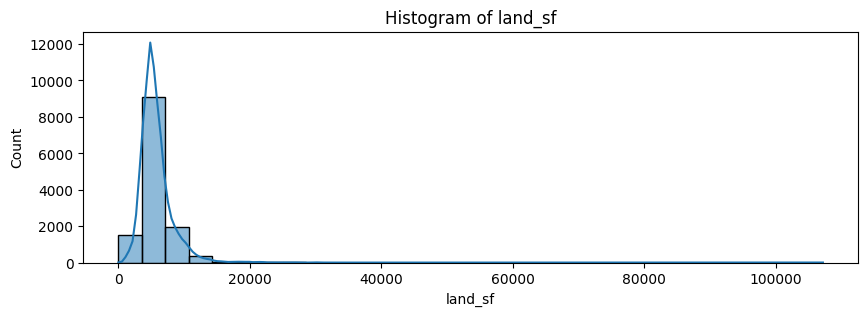

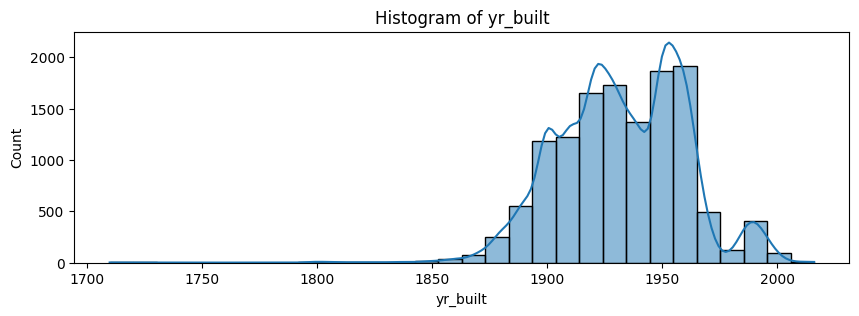

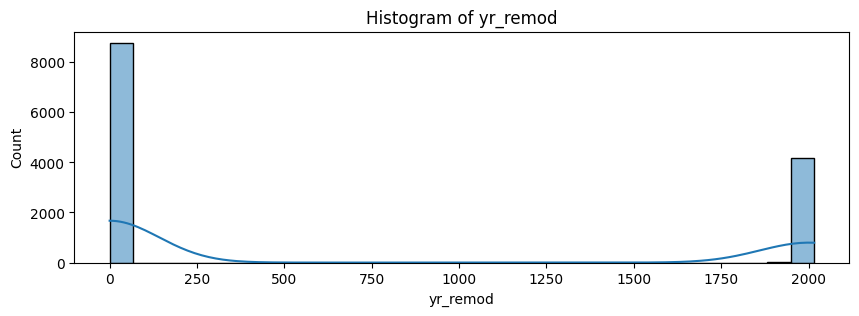

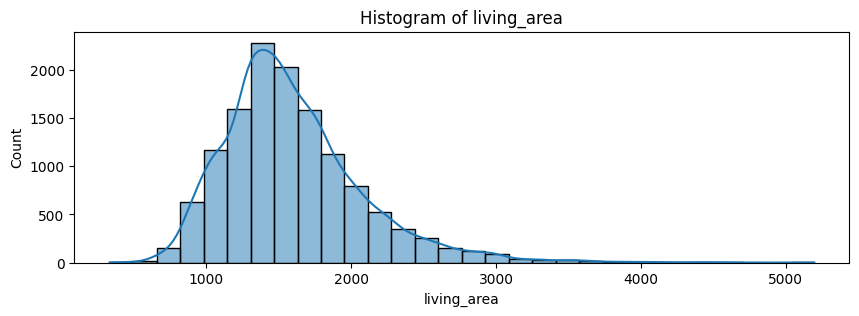

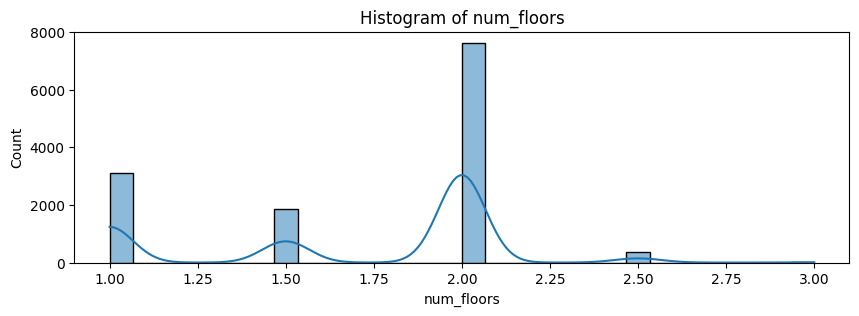

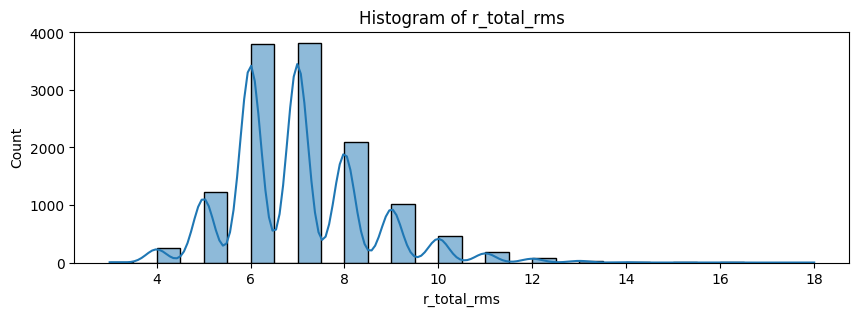

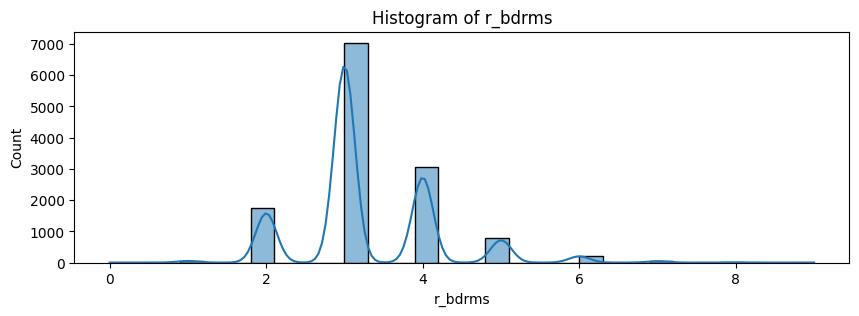

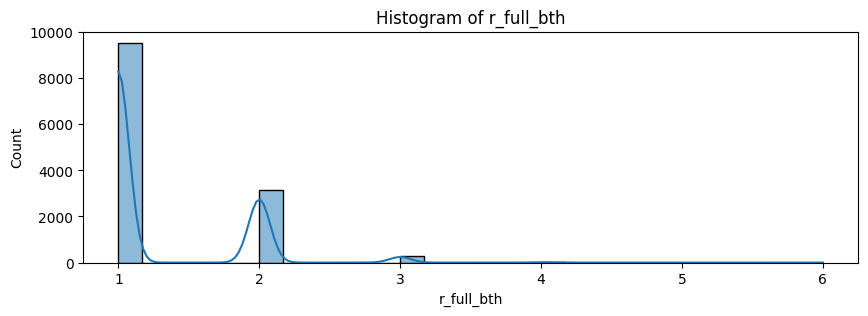

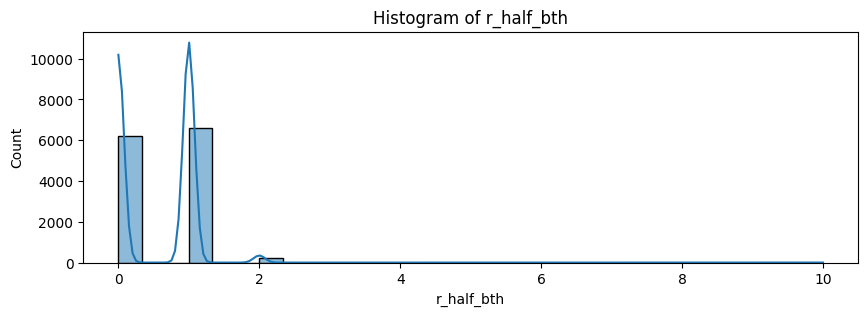

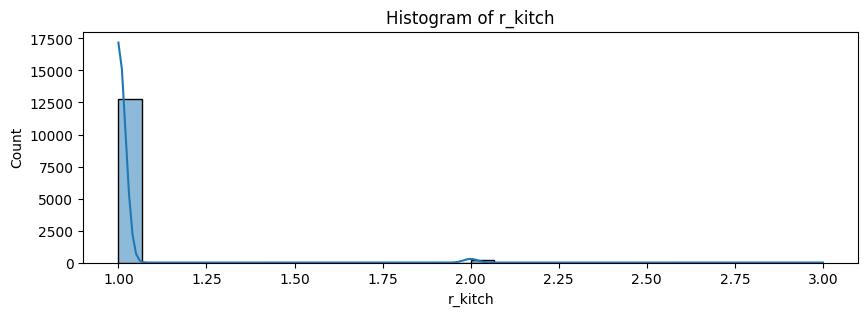

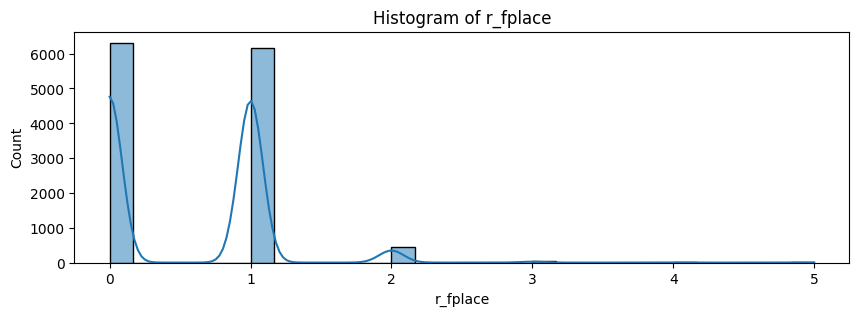

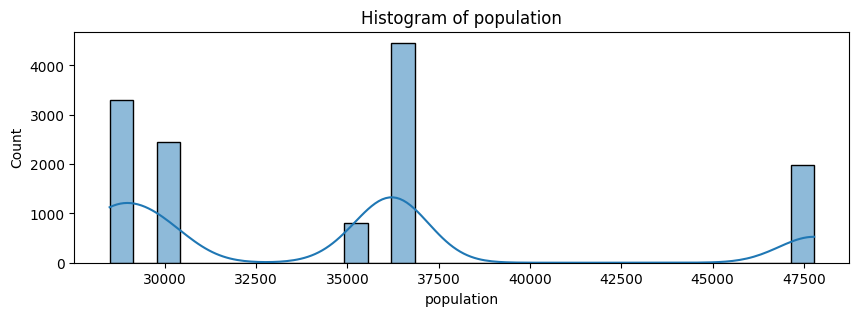

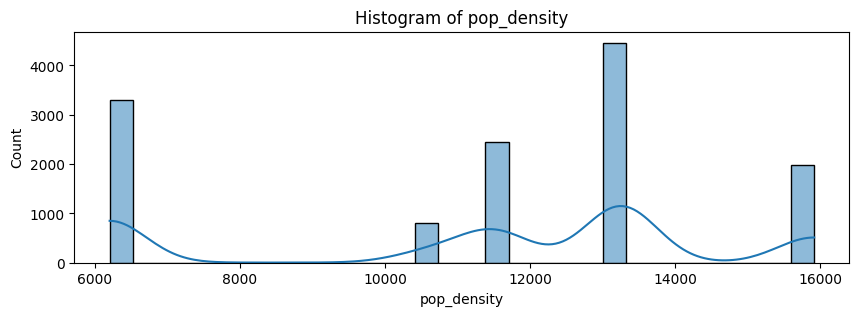

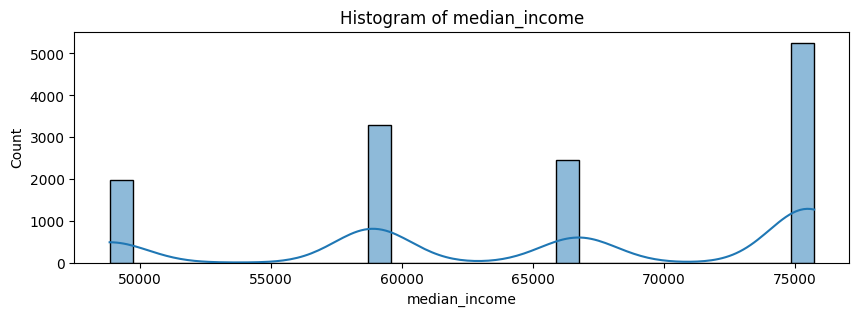

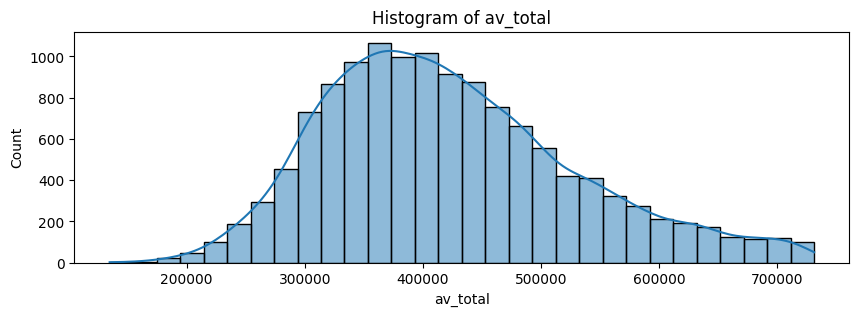

In [ ]:
numeric_features = ['land_sf', 'yr_built', 'yr_remod', 'living_area',
       'num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       'r_kitch', 'r_fplace','population', 'pop_density',
       'median_income','av_total']
for feature in numeric_features:
  plt.figure(figsize=(10, 3))
  sns.histplot(boston,x=feature, bins=30, kde=True,)
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.show()

Some graphs that stand out from this analysis are the land square footage, the year built, and the living area.  The majority of land square footage seems to be between 5000 and 10000 square feet.  The majority of homes built are from the early to mid 20th century, and the majority of living area seems to be about 1400 square feet.

Boxplots of Numerical Features to Identify Outliers

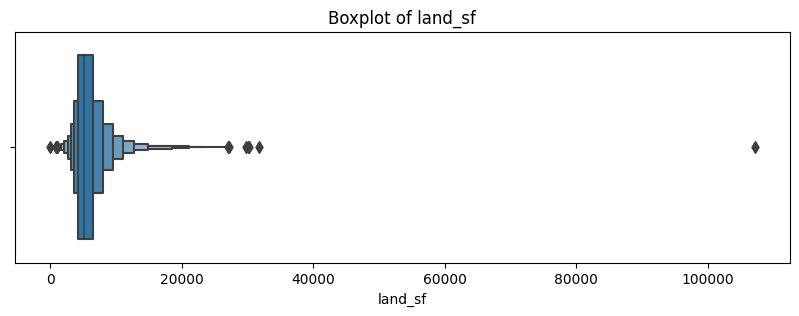

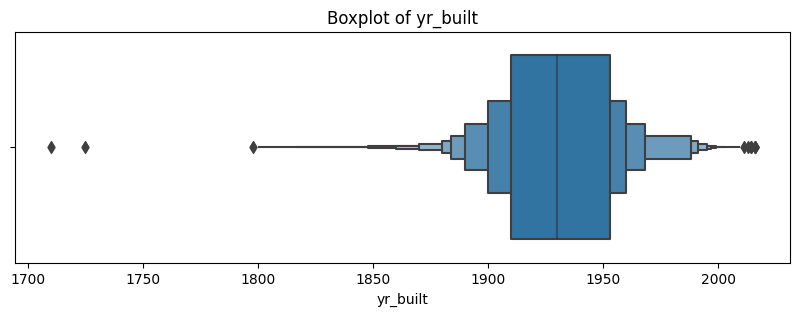

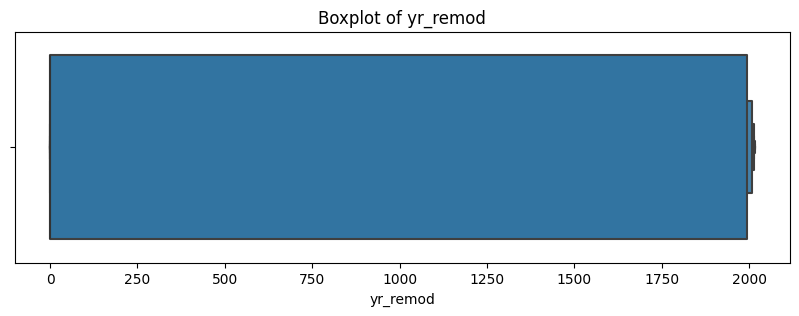

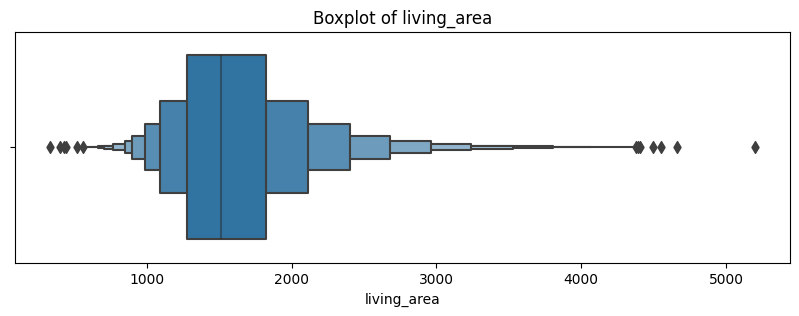

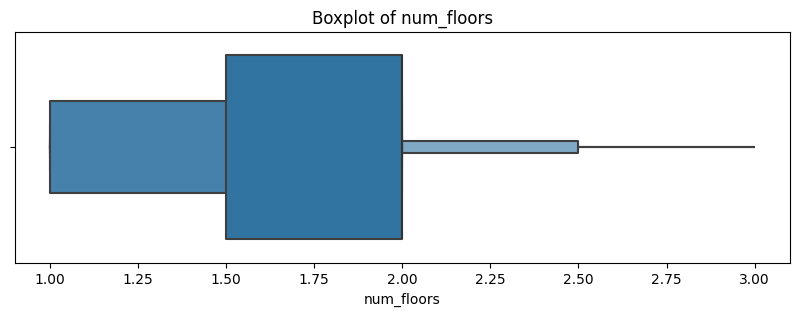

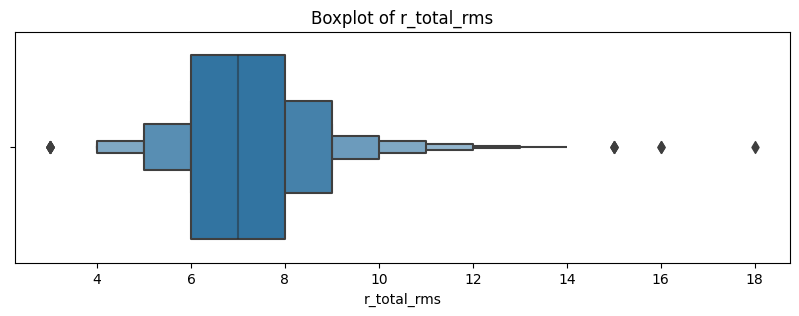

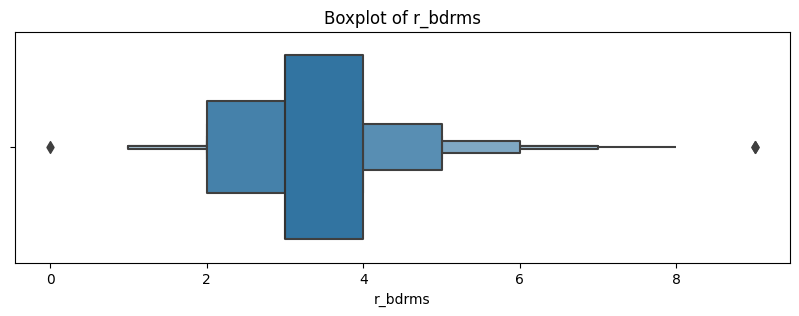

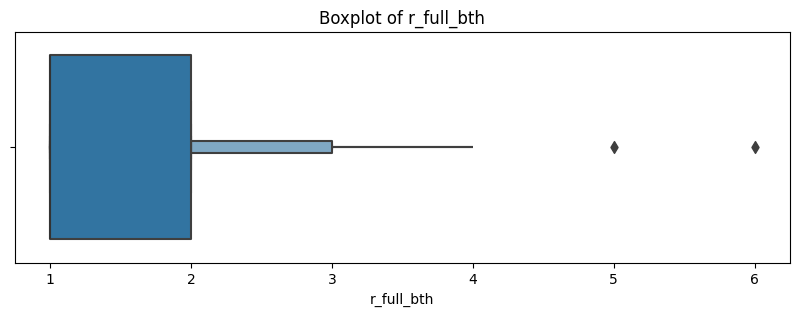

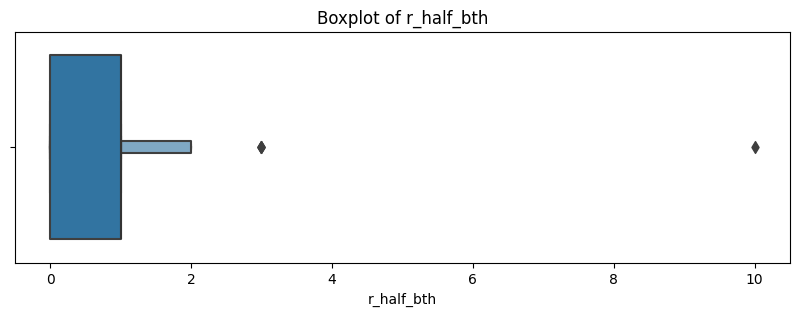

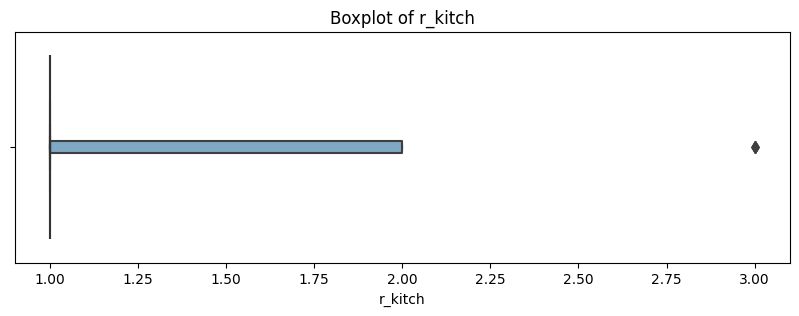

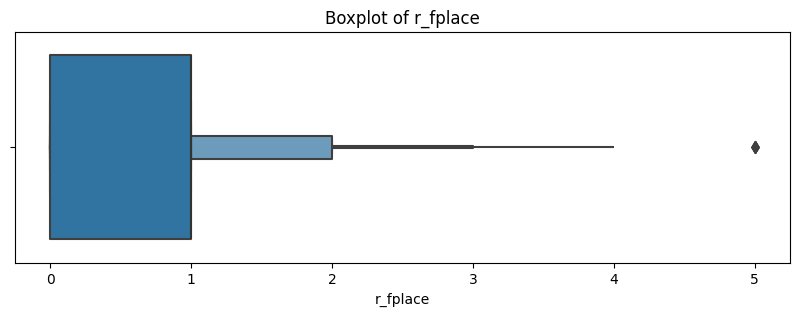

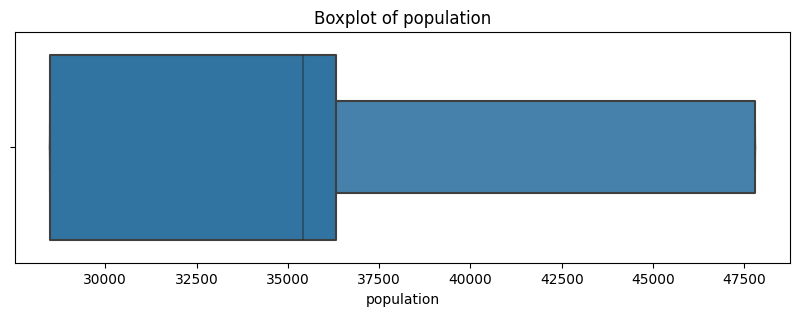

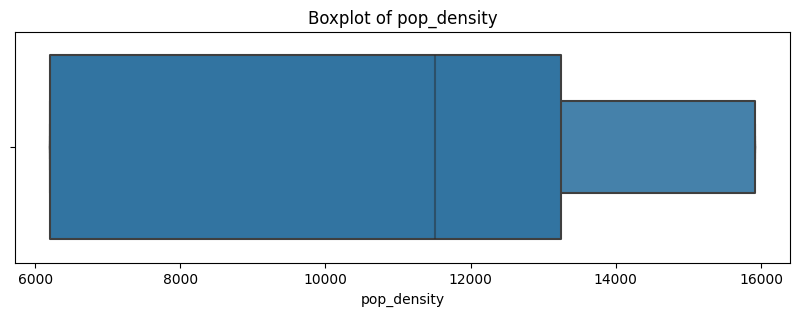

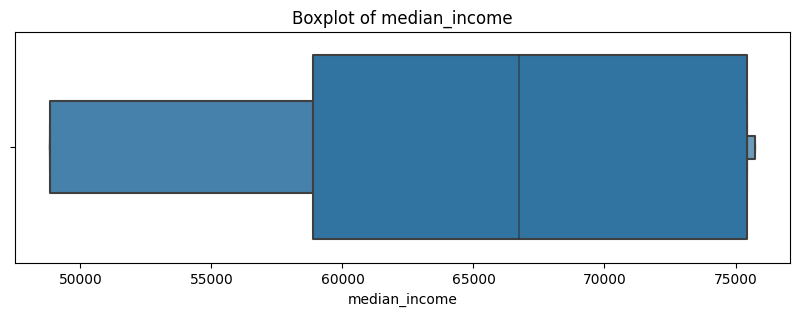

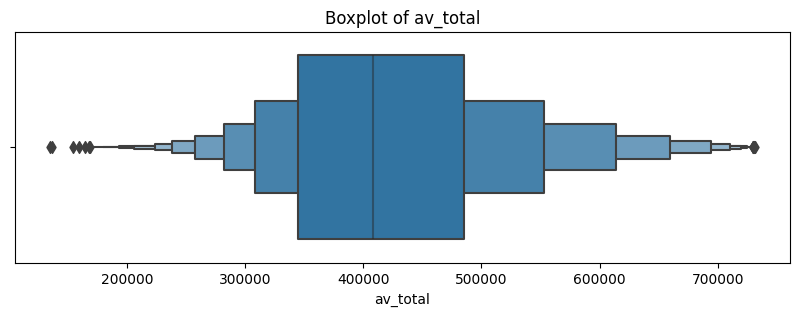

In [ ]:
for feature in numeric_features:
  plt.figure(figsize=(10, 3))
  sns.boxenplot(boston,x=feature)
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  plt.show()

There are definitely a few outliers noticeable, especially in land square footage, living area, and total number of rooms.  

#Statistical Analysis of Numerical Features

In [ ]:
boston[numeric_features].describe().transpose()

count        mean         std         min         25%  \
land_sf       12985.0000   5730.7759   2566.2694      0.0000   4256.0000   
yr_built      12985.0000   1932.2873     27.2871   1710.0000   1910.0000   
yr_remod      12985.0000    648.3590    936.6131      0.0000      0.0000   
living_area   12985.0000   1593.3926    480.5655    332.0000   1276.0000   
num_floors    12985.0000      1.7050      0.4441      1.0000      1.5000   
r_total_rms   12985.0000      6.9881      1.4691      3.0000      6.0000   
r_bdrms       12985.0000      3.2830      0.8885      0.0000      3.0000   
r_full_bth    12985.0000      1.2903      0.5090      1.0000      1.0000   
r_half_bth    12985.0000      0.5403      0.5379      0.0000      0.0000   
r_kitch       12985.0000      1.0171      0.1314      1.0000      1.0000   
r_fplace      12985.0000      0.5565      0.5864      0.0000      0.0000   
population    12985.0000  34798.5803   6428.1106  28488.0000  28488.0000   
pop_density   12985.0000  11377.3372   3342.8946   6207.0000   6207.0000   
median_income 12985.0000  65556.6671   9703.9058  48841.0000  58890.0000   
av_total      12985.0000 422596.3783 106410.6568 134800.0000 344500.0000   

                      50%         75%         max  
land_sf         5200.0000   6543.0000 107158.0000  
yr_built        1930.0000   1953.0000   2016.0000  
yr_remod           0.0000   1994.0000   2016.0000  
living_area     1514.0000   1825.0000   5197.0000  
num_floors         2.0000      2.0000      3.0000  
r_total_rms        7.0000      8.0000     18.0000  
r_bdrms            3.0000      4.0000      9.0000  
r_full_bth         1.0000      2.0000      6.0000  
r_half_bth         1.0000      1.0000     10.0000  
r_kitch            1.0000      1.0000      3.0000  
r_fplace           1.0000      1.0000      5.0000  
population     35401.0000  36314.0000  47783.0000  
pop_density    11505.0000  13251.0000  15913.0000  
median_income  66735.0000  75446.0000  75730.0000  
av_total      408100.0000 485500.0000 731272.8377

Scatter Plots of Total Assessed Value and Numerical Features

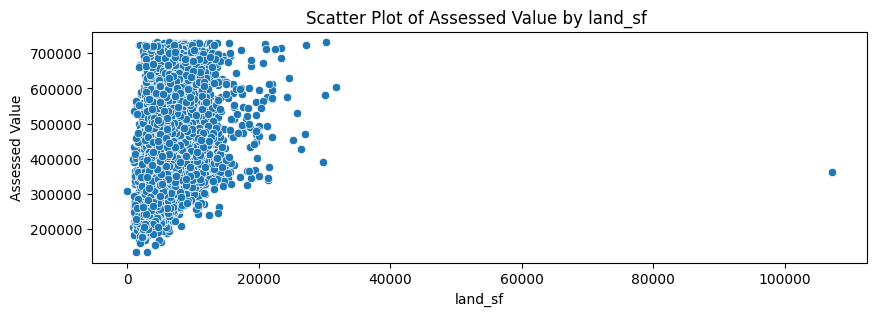

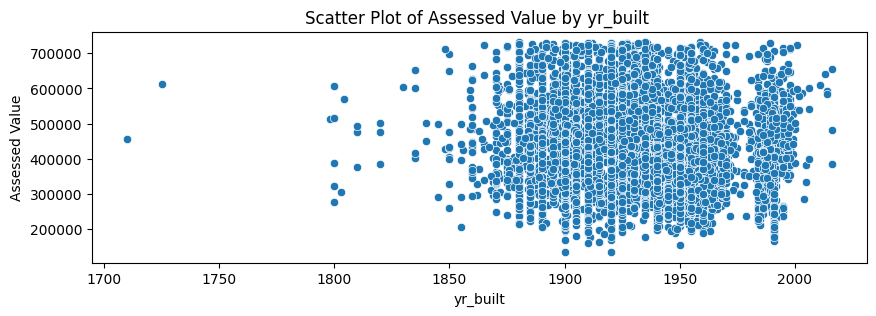

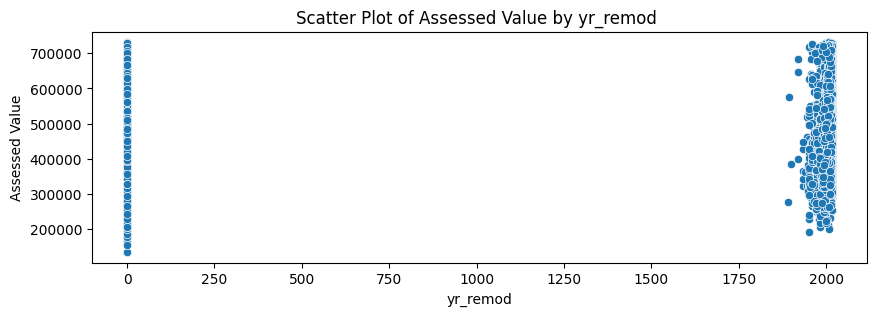

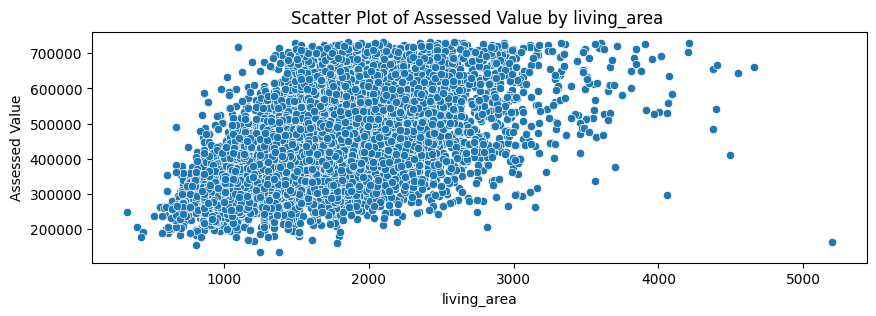

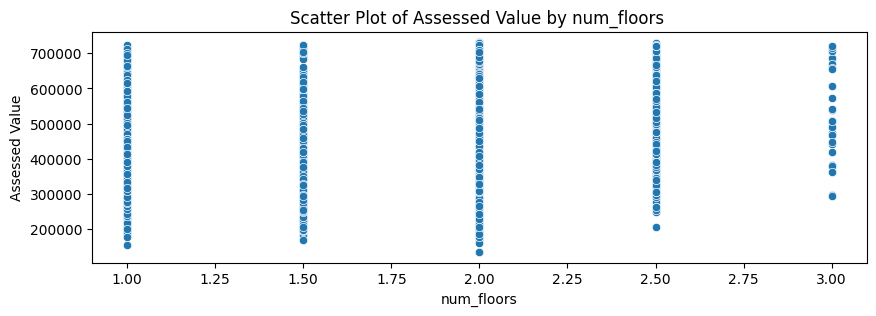

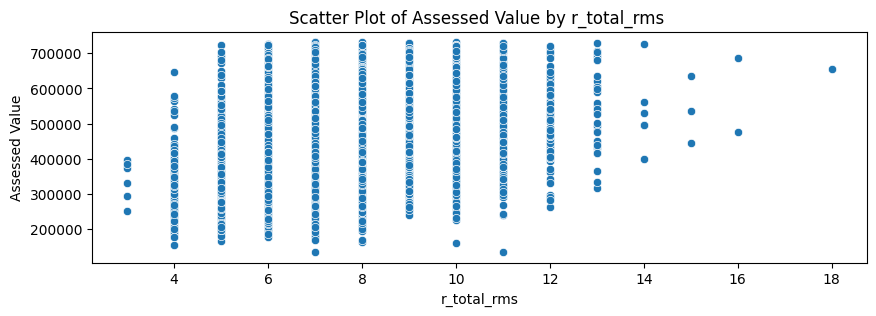

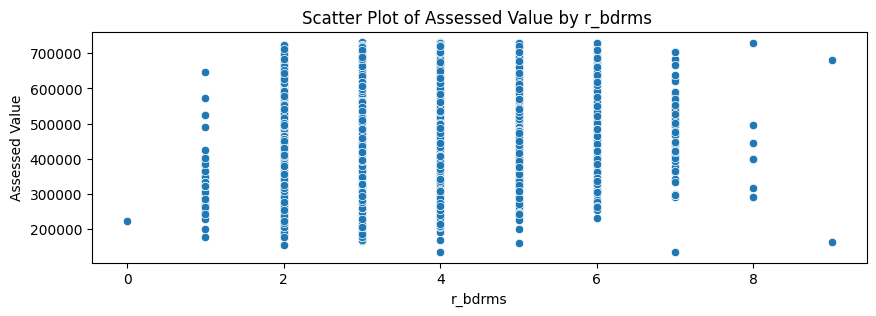

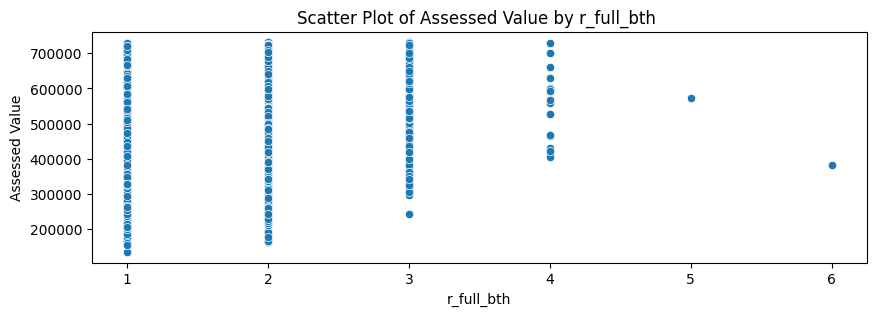

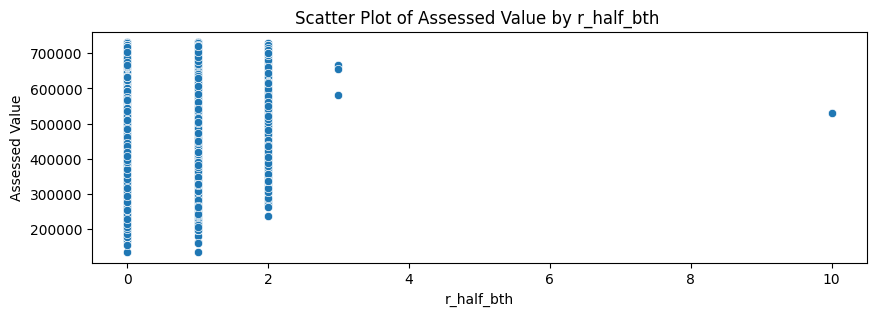

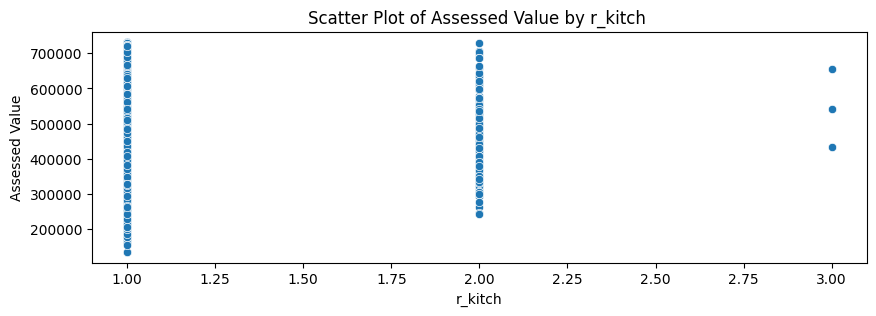

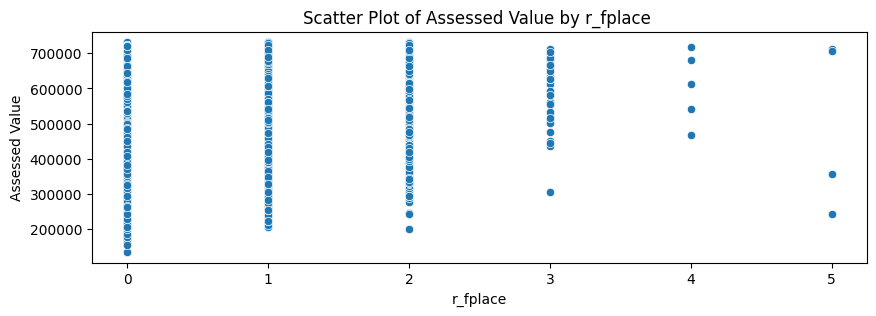

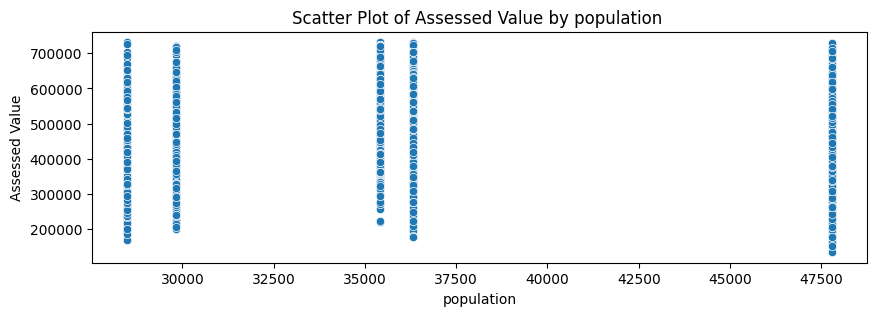

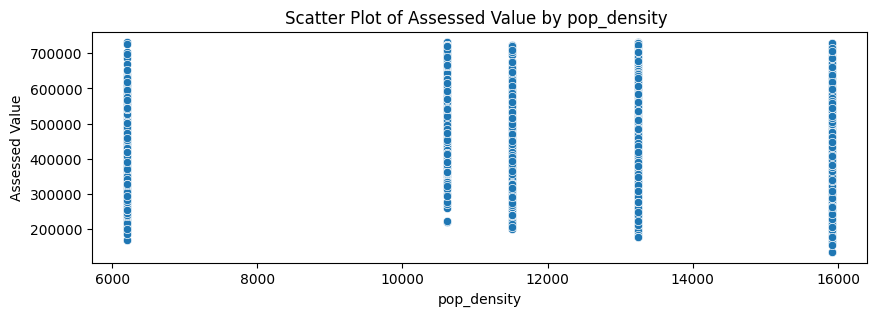

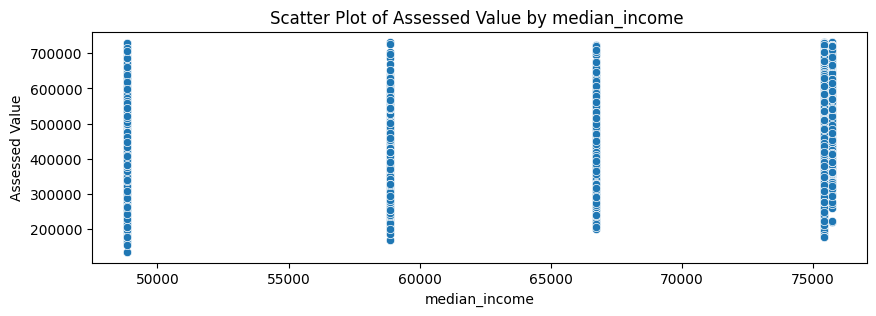

In [ ]:
for feature in numeric_features:
  if feature != 'av_total':
    plt.figure(figsize=(10, 3))
    sns.scatterplot(boston,x=feature, y='av_total')
    plt.title(f'Scatter Plot of Assessed Value by {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Assessed Value')
    plt.show()

Correlations - The linear relationship between Each Variable and Total Assessed Value

In [ ]:
# Compute the correlation of each variable with the target
correlations = boston[numeric_features].apply(lambda x: x.corr(boston['av_total']))
boston_correlations = correlations.to_frame(name='correlation')
boston_correlations = boston_correlations.sort_values('correlation', ascending=False)
boston_correlations

correlation
av_total            1.0000
living_area         0.5648
median_income       0.4169
r_total_rms         0.4040
num_floors          0.3763
r_bdrms             0.2979
r_fplace            0.2885
pop_density         0.2864
r_half_bth          0.2744
land_sf             0.2667
yr_remod            0.2592
r_full_bth          0.2362
population          0.1195
r_kitch             0.0192
yr_built           -0.1736

Heatmap- Easier Visualization of Numeric Correlations

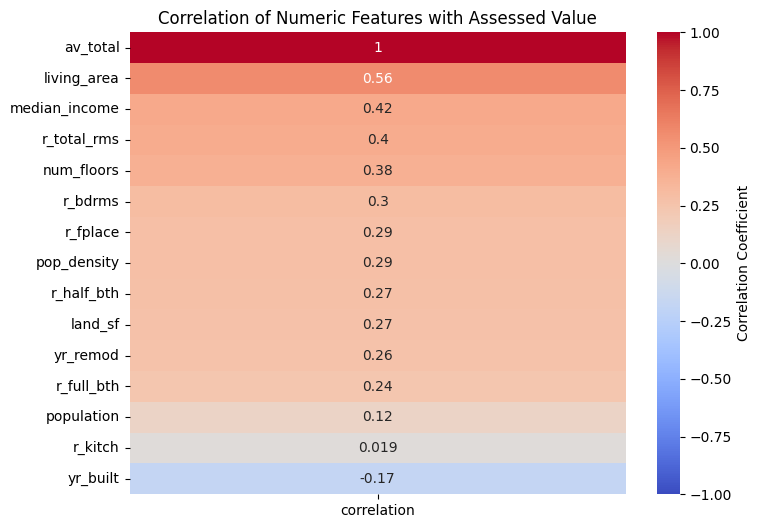

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(boston_correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Numeric Features with Assessed Value')
plt.show()

It is interesting that median income has a strong positive correlation with assessed value, maybe it is because the owners can afford more living area, which has an even stronger correlation with assessed value.  It is also interesting that, as the year bulit increases, the assessed value decreases.

#Categorical Data Exploratory Analysis

In [ ]:
categorical_columns = boston.select_dtypes(include=['object']).columns
categorical_columns

Index(['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state'],
      dtype='object')

In [ ]:
categorical_features = ['zipcode','own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state']

zipcode
2132    4460
2136    3298
2131    2446
2124    1982
2130     799
Name: zipcode, dtype: int64


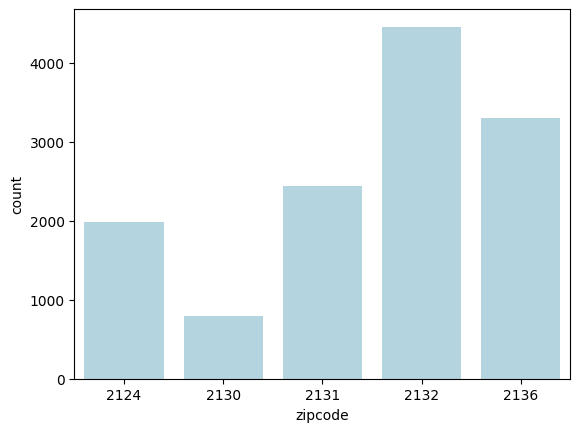

own_occ
Y    11412
N     1573
Name: own_occ, dtype: int64


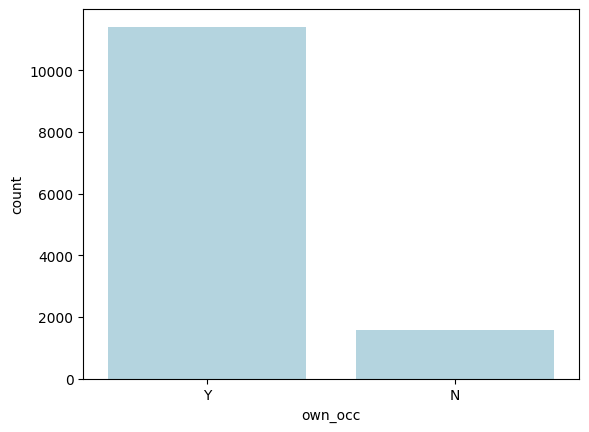

structure_class
R    12985
Name: structure_class, dtype: int64


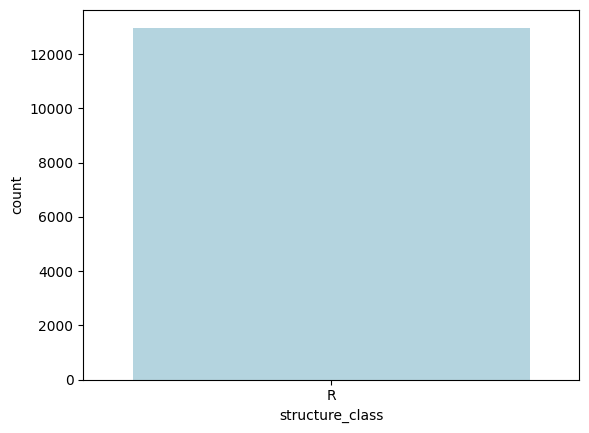

r_bldg_styl
CL    7635
CP    2285
RN     983
BW     668
RR     504
CV     427
SD     133
SL      84
VT      77
RE      67
RM      67
TL      19
TD      19
CN      12
BL       2
OT       2
DK       1
Name: r_bldg_styl, dtype: int64


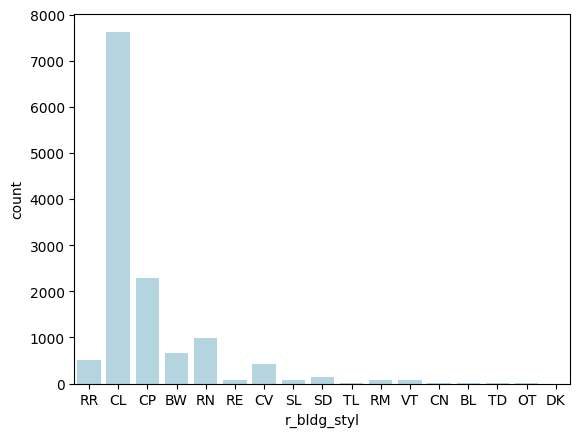

r_roof_typ
G    10353
H     1658
L      673
M      138
S      126
F       37
Name: r_roof_typ, dtype: int64


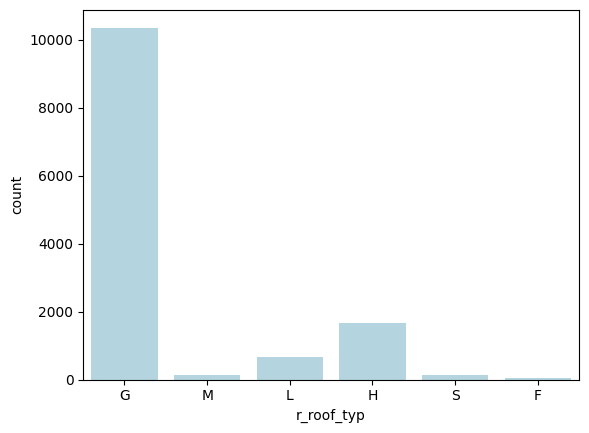

r_ext_fin
M    7372
W    3642
F     740
A     591
B     284
S     118
U      84
C      60
P      52
V      41
G       1
Name: r_ext_fin, dtype: int64


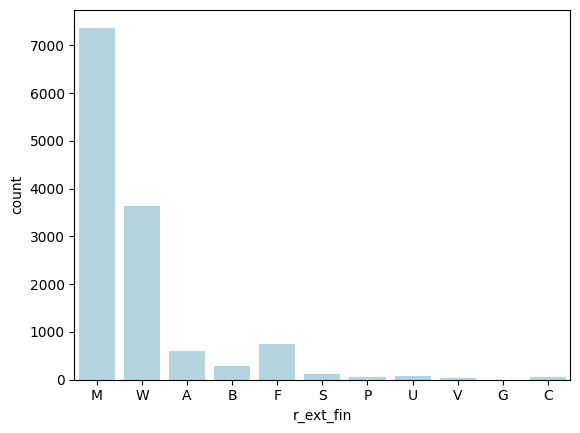

r_bth_style
S    8876
M    3240
N     861
L       8
Name: r_bth_style, dtype: int64


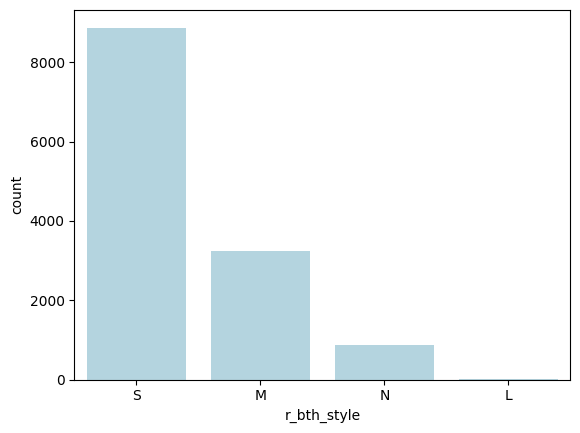

r_kitch_style
S    7984
M    4107
N     878
L      16
Name: r_kitch_style, dtype: int64


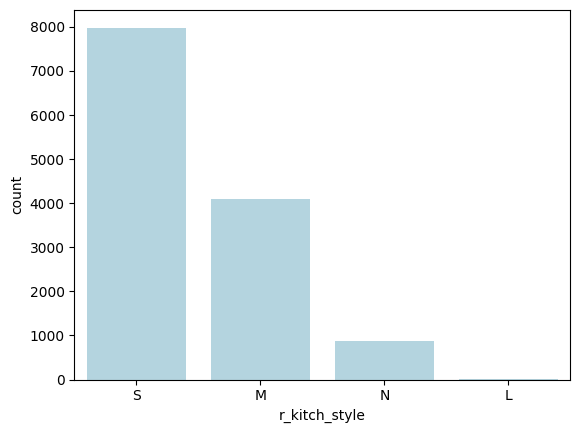

r_heat_typ
W    9694
F    3056
E     168
P      36
N      17
O      10
S       4
Name: r_heat_typ, dtype: int64


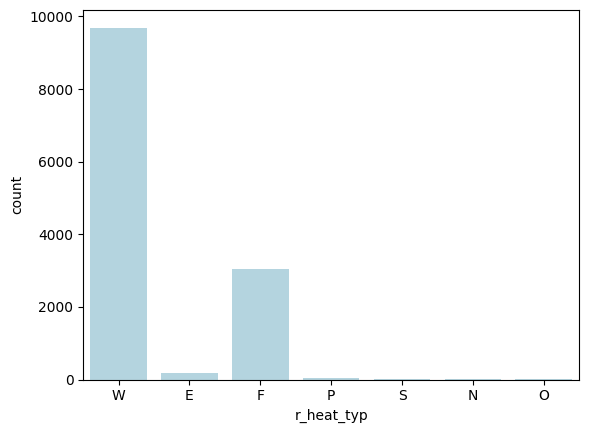

r_ac
N    11167
C     1760
D       58
Name: r_ac, dtype: int64


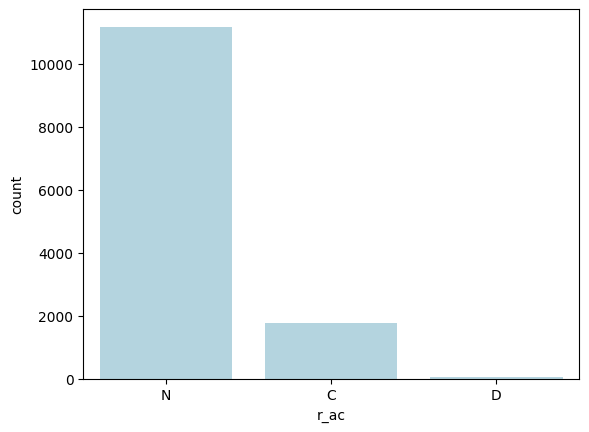

r_ext_cnd
A    10996
G     1647
F      328
P       13
E        1
Name: r_ext_cnd, dtype: int64


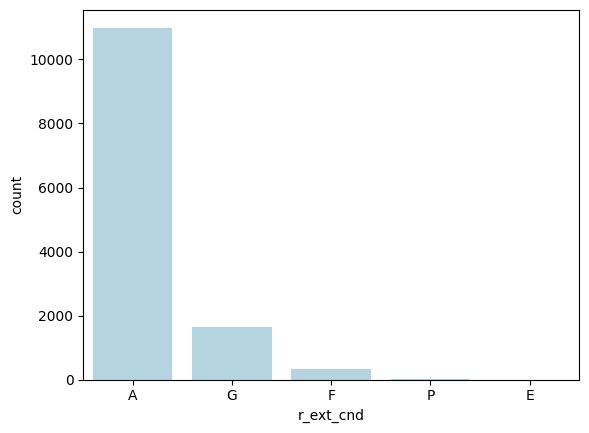

r_ovrall_cnd
A    11293
G     1576
F      108
P        8
Name: r_ovrall_cnd, dtype: int64


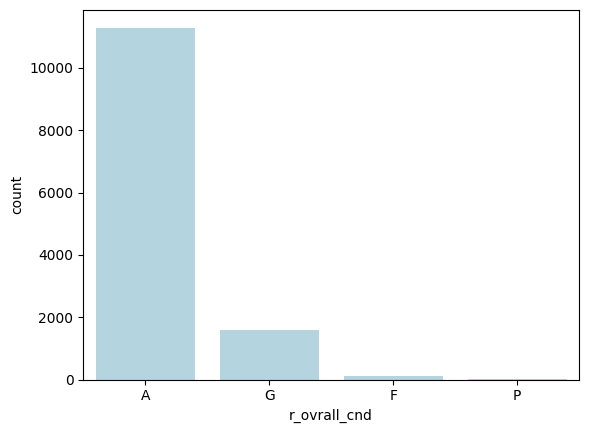

r_int_cnd
A    9823
G    2976
F     176
P      10
Name: r_int_cnd, dtype: int64


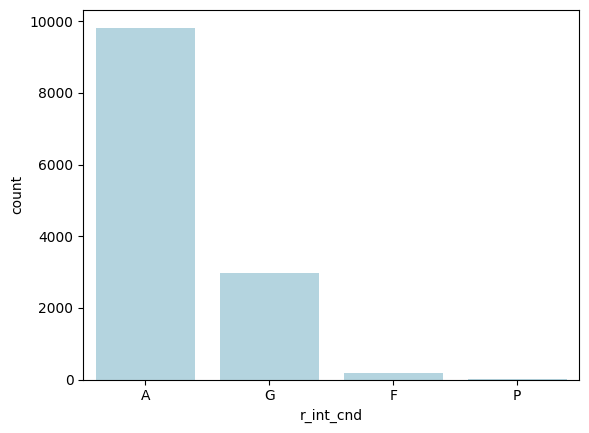

r_int_fin
N    12982
S        2
E        1
Name: r_int_fin, dtype: int64


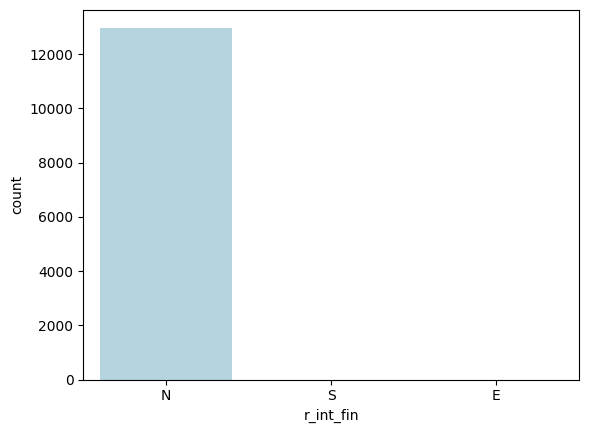

r_view
A    12225
G      369
F      359
P       23
E        9
Name: r_view, dtype: int64


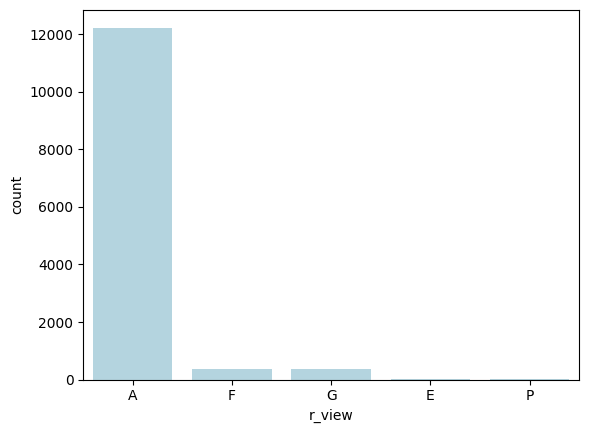

city_state
Cambridge, MA            4460
Hyde Park, MA            3298
Roslindale, MA           2446
Dorchester Center, MA    1982
Jamaica Plain, MA         799
Name: city_state, dtype: int64


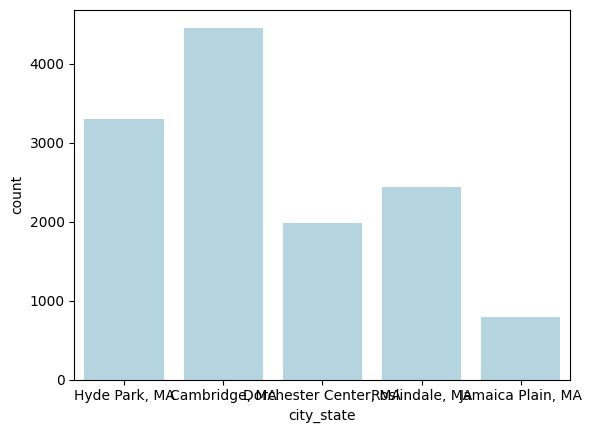

In [ ]:
for cat in categorical_features:
  print(cat)
  print(boston[cat].value_counts())
  sns.countplot(data=boston,x=cat, color='lightblue')
  plt.show()

It makes sense that a lot of houses are colonial style and dont have ac, as Boston is an old city.  The conditions of the houses and its features are relatively good, which means that the city does well to maintain its buildings.

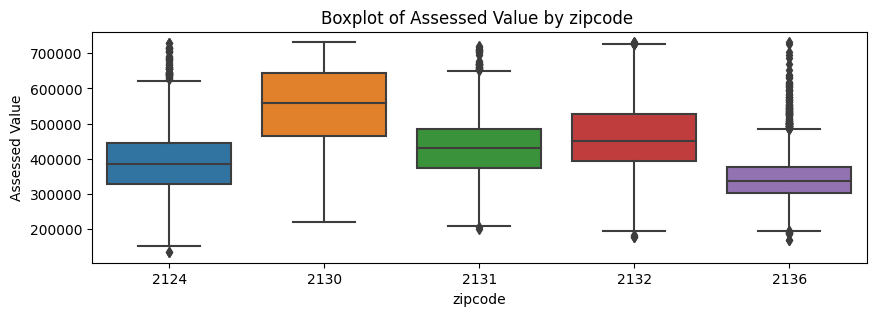

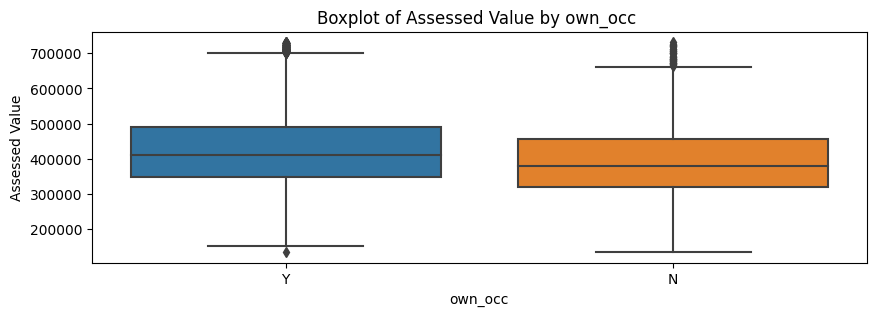

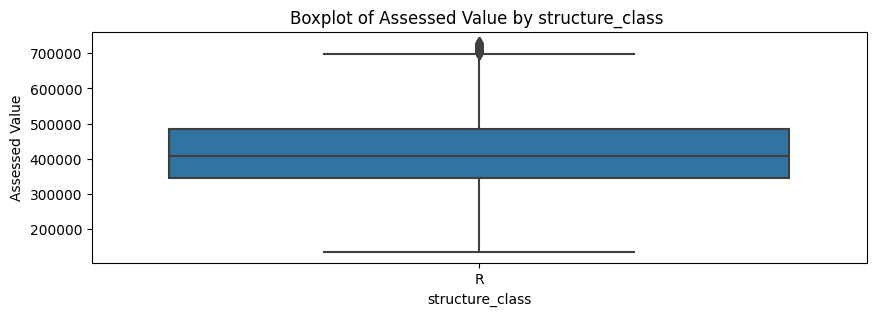

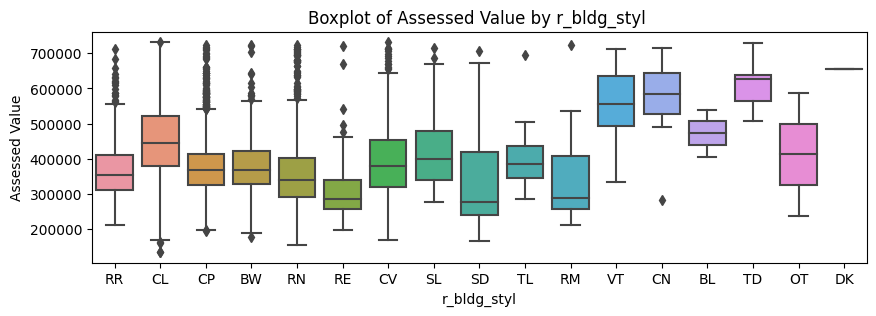

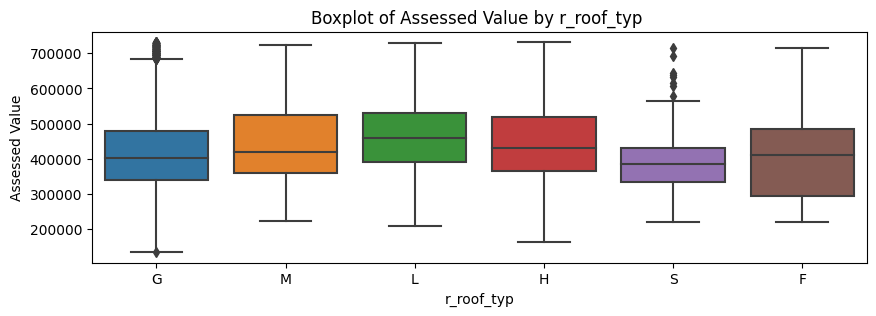

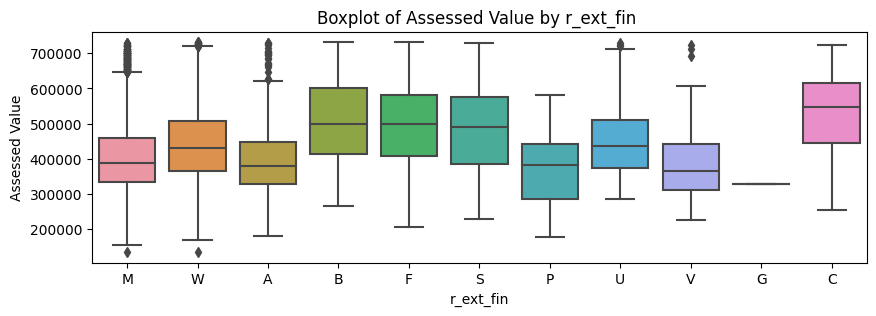

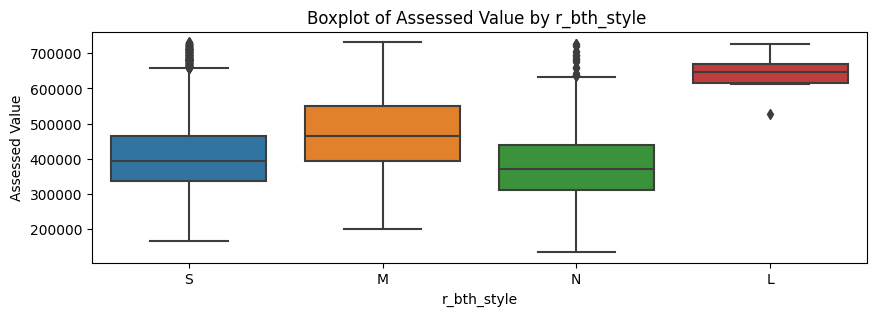

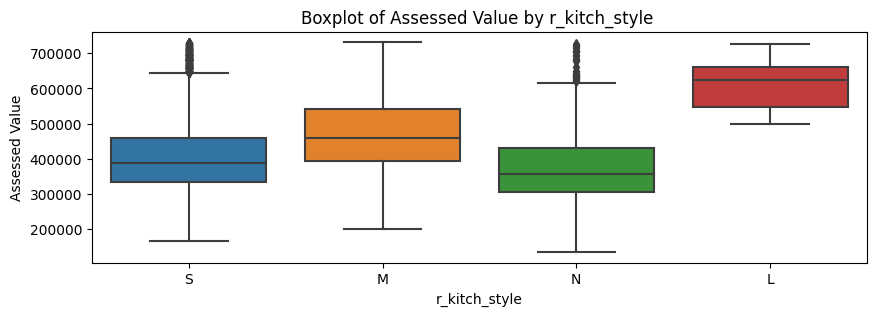

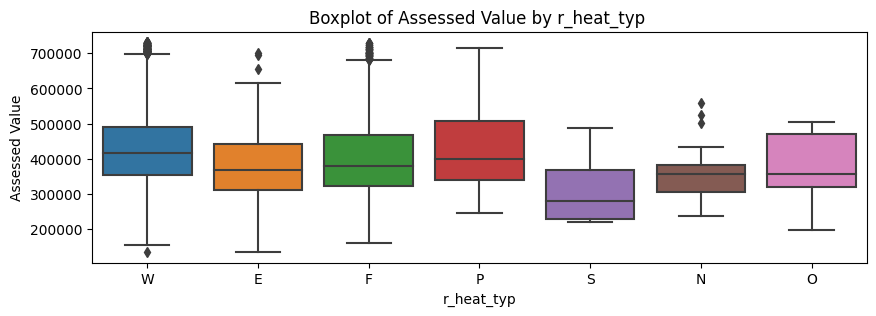

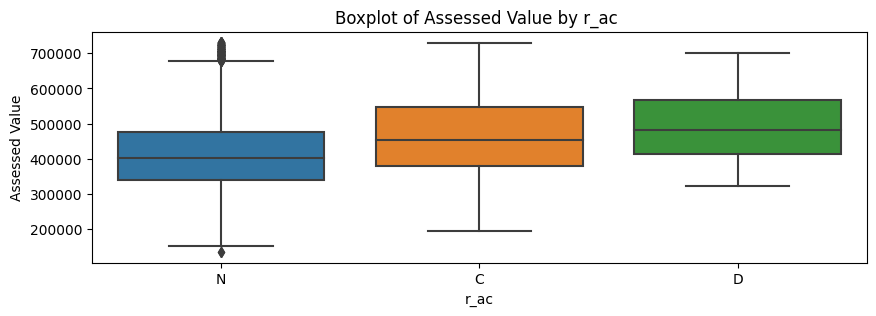

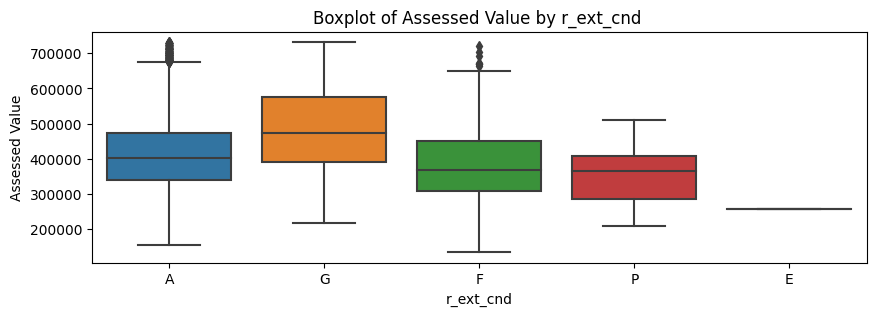

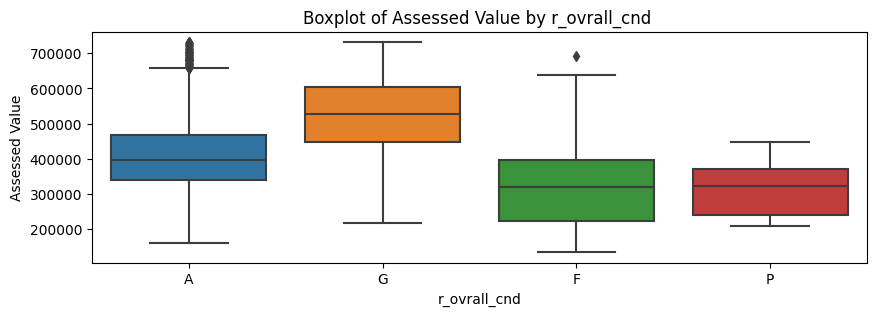

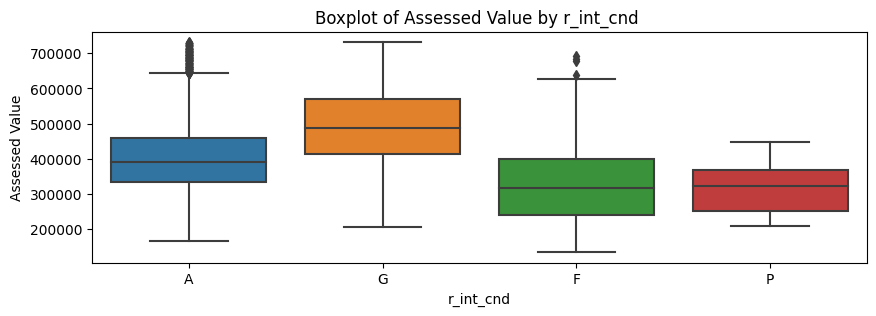

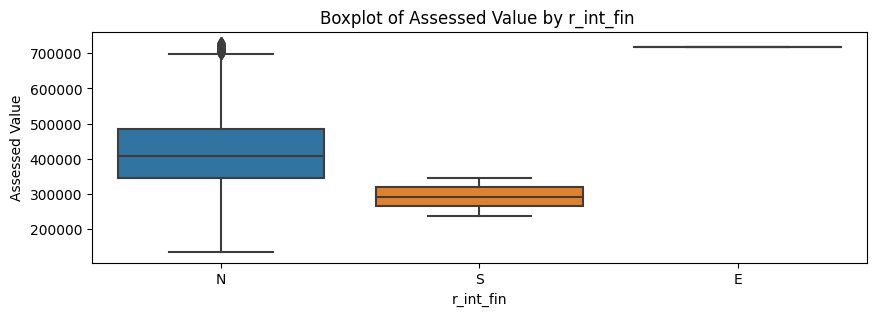

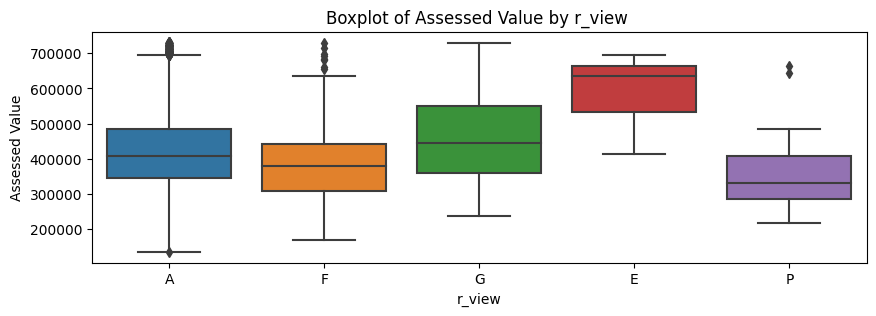

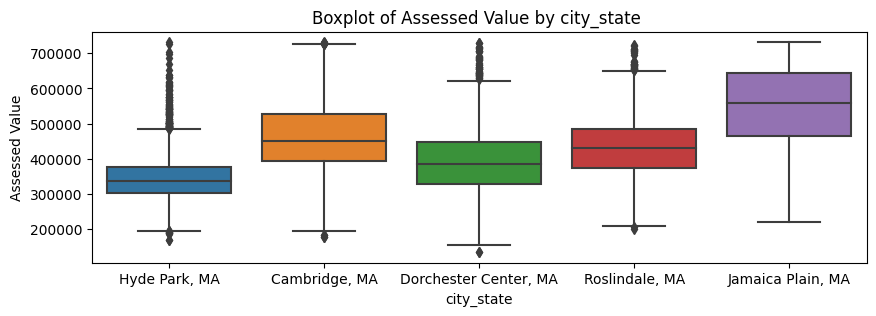

In [ ]:
for category in categorical_features:
  plt.figure(figsize=(10, 3))
  sns.boxplot(boston,x=category, y='av_total')
  plt.title(f'Boxplot of Assessed Value by {category} ')
  plt.xlabel(category)
  plt.ylabel('Assessed Value')
  plt.show()

One thing that really stands out from the box plots is that Jamaica Plain properties may be a good place to invest, as they have a noticeably higher assessed value than the other cities.  It is also expected that the conditions of the house and its features seem to have a pretty strong relationship.

#Scatter Plots of Total Assessed Value and Numerical Features

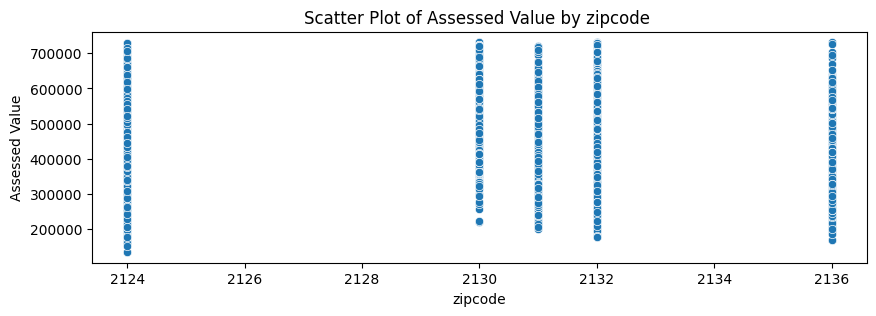

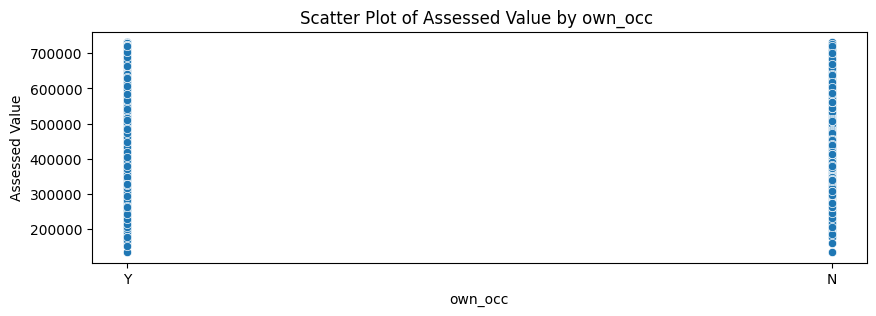

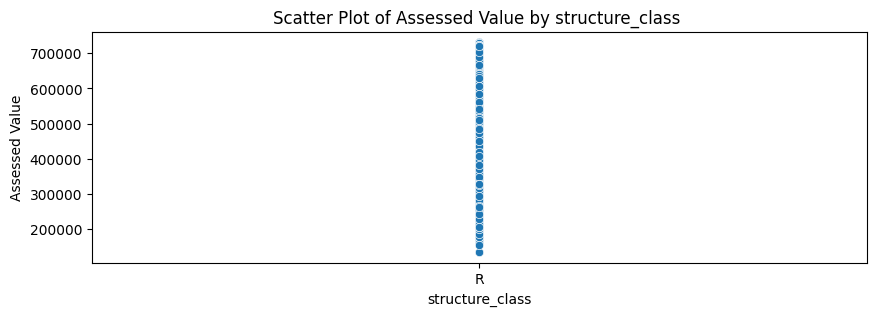

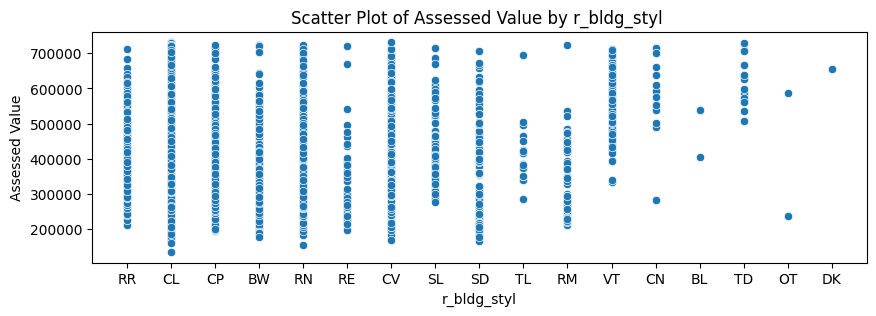

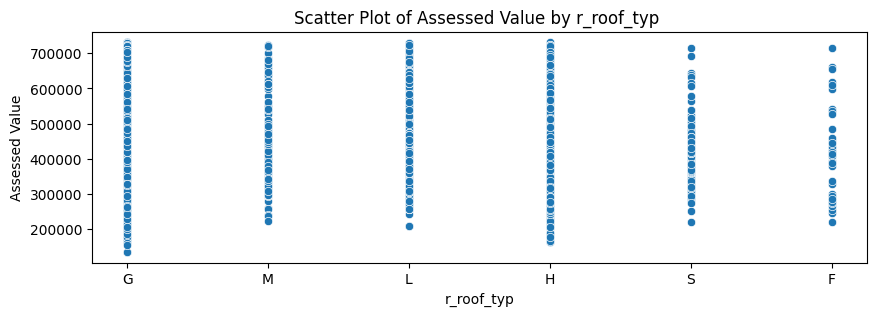

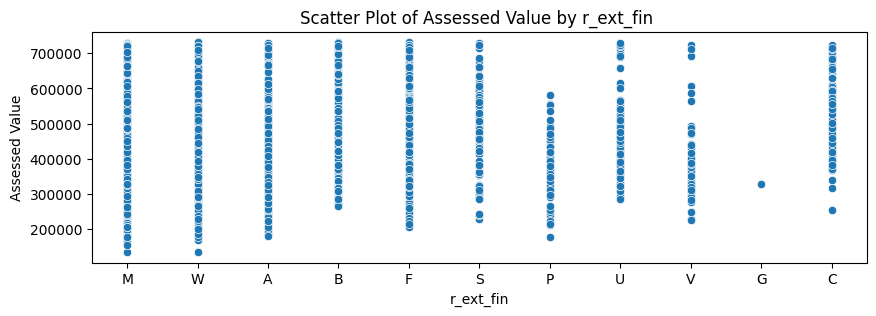

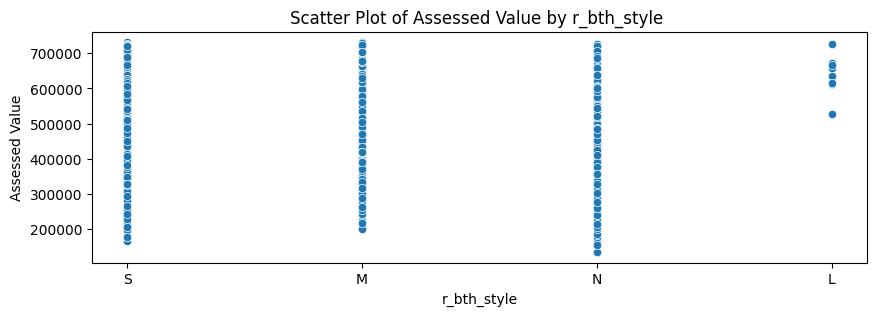

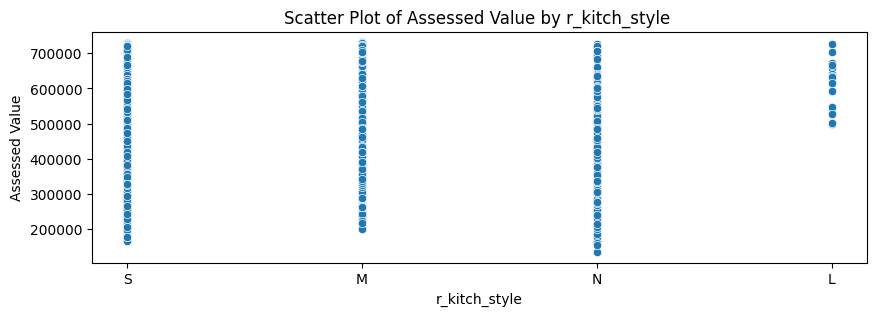

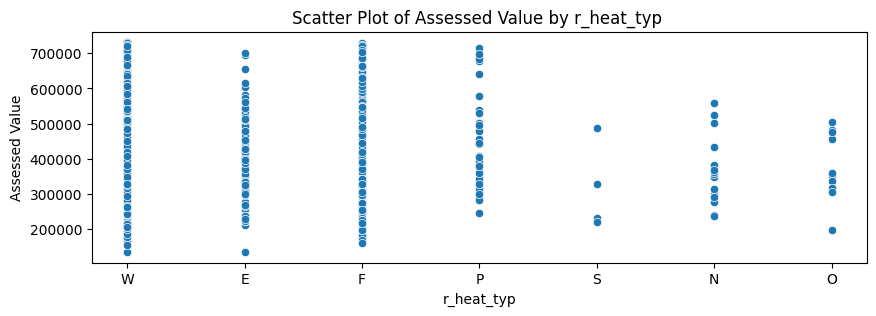

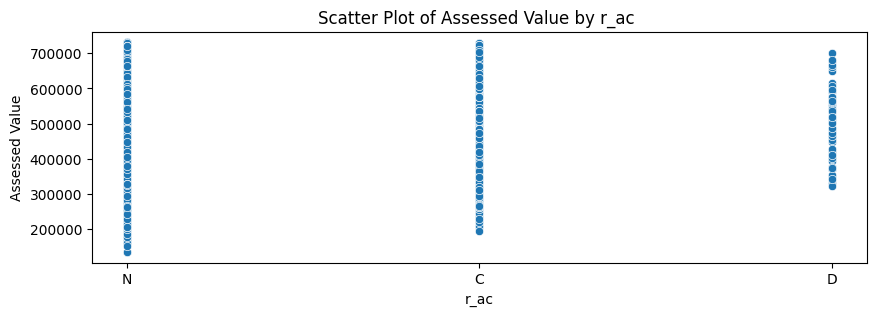

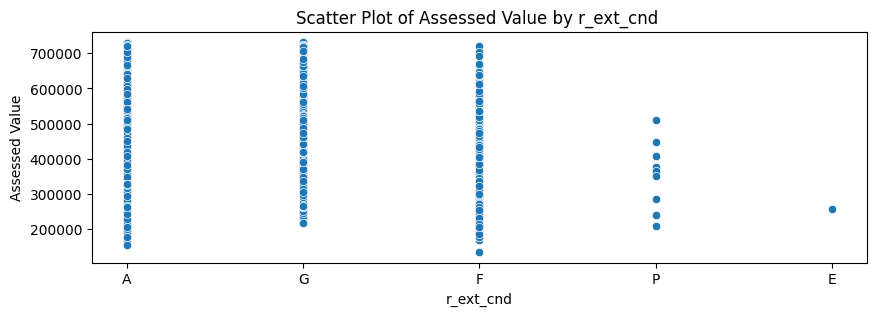

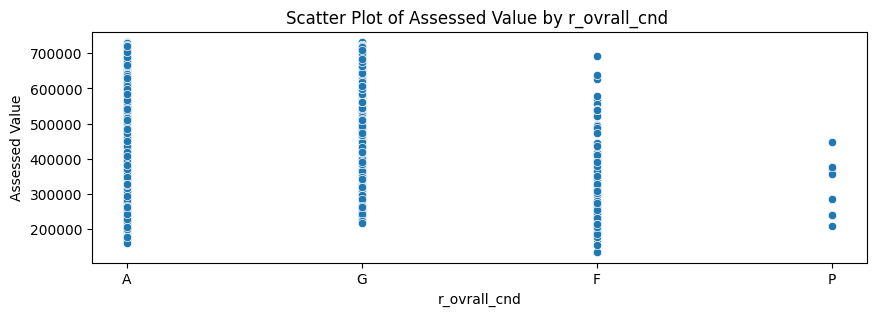

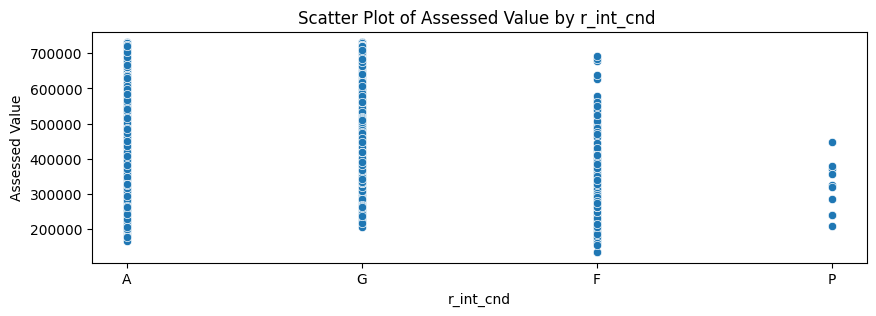

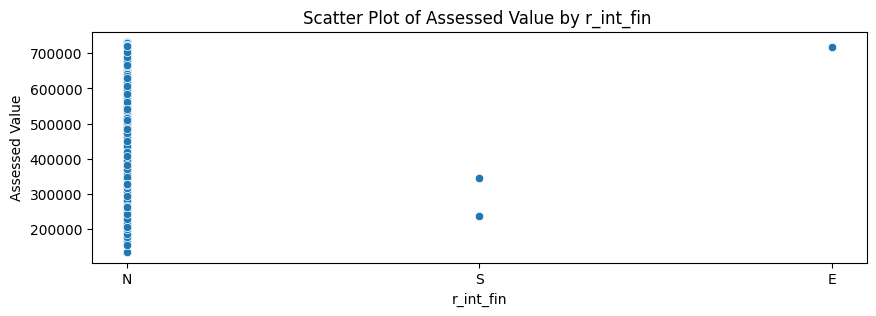

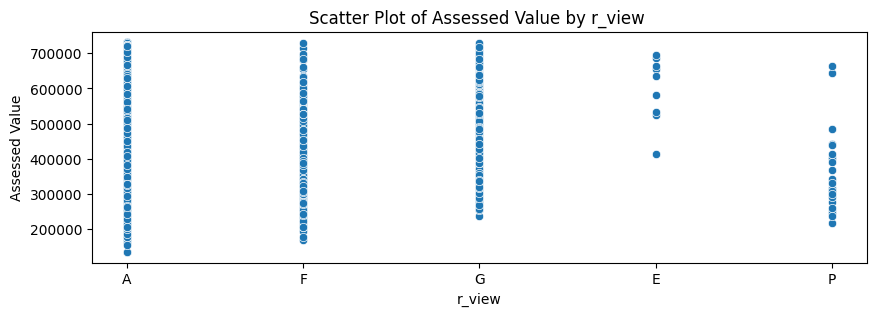

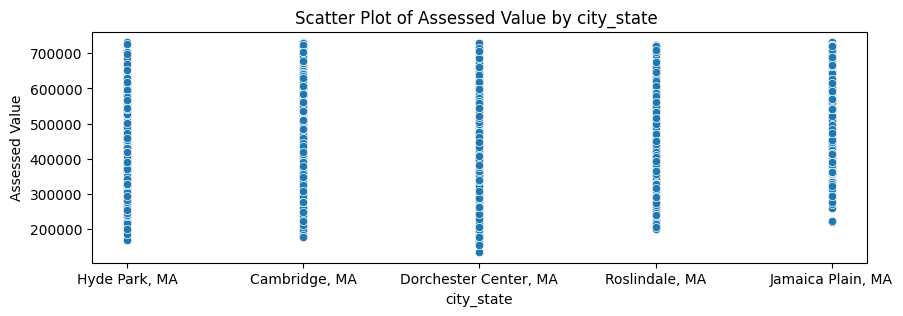

In [ ]:
for feature in categorical_features:
  if feature != 'av_total':
    plt.figure(figsize=(10, 3))
    sns.scatterplot(boston,x=feature, y='av_total')
    plt.title(f'Scatter Plot of Assessed Value by {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Assessed Value')
    plt.show()

#Correlations - Correlation of All Variables to Assessed Value Total

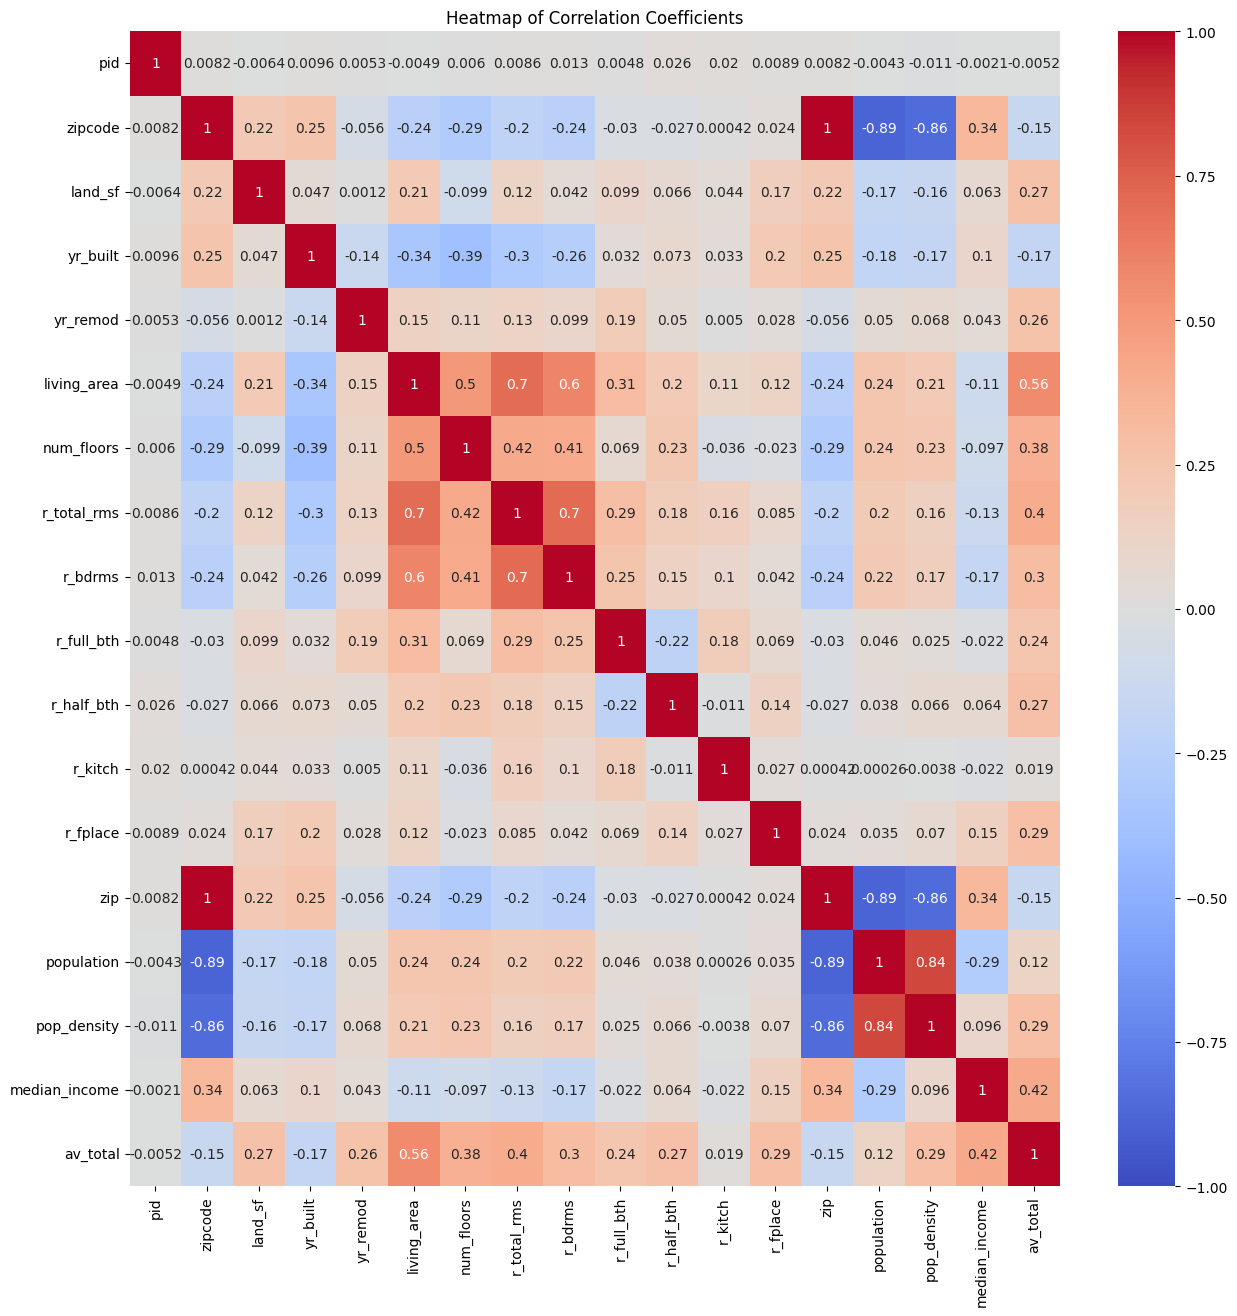

In [ ]:
correlation_matrix_boston = boston.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_boston, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

It makes sense that living area, number of floors, total rooms, and total bedrooms have a strong correlation, as having more living area would lead to bigger houses.

#Specific Client Questions

In [ ]:
boston.columns

Index(['pid', 'zipcode', 'own_occ', 'land_sf', 'yr_built', 'yr_remod',
       'living_area', 'num_floors', 'structure_class', 'r_bldg_styl',
       'r_roof_typ', 'r_ext_fin', 'r_total_rms', 'r_bdrms', 'r_full_bth',
       'r_half_bth', 'r_bth_style', 'r_kitch', 'r_kitch_style', 'r_heat_typ',
       'r_ac', 'r_fplace', 'r_ext_cnd', 'r_ovrall_cnd', 'r_int_cnd',
       'r_int_fin', 'r_view', 'zip', 'population', 'pop_density',
       'median_income', 'city_state', 'av_total'],
      dtype='object')

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12985 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              12985 non-null  int64  
 1   zipcode          12985 non-null  int64  
 2   own_occ          12985 non-null  object 
 3   land_sf          12985 non-null  float64
 4   yr_built         12985 non-null  int64  
 5   yr_remod         12985 non-null  float64
 6   living_area      12985 non-null  int64  
 7   num_floors       12985 non-null  float64
 8   structure_class  12985 non-null  object 
 9   r_bldg_styl      12985 non-null  object 
 10  r_roof_typ       12985 non-null  object 
 11  r_ext_fin        12985 non-null  object 
 12  r_total_rms      12985 non-null  int64  
 13  r_bdrms          12985 non-null  int64  
 14  r_full_bth       12985 non-null  int64  
 15  r_half_bth       12985 non-null  int64  
 16  r_bth_style      12985 non-null  object 
 17  r_kitch     

#Owner-occupied homes have a higher assessed value

In [ ]:
oo_home_yes_filter= boston['own_occ']=='Y'
oo_home_yes_filter

0        True
2        True
3        True
4        True
5        True
         ... 
14220    True
14221    True
14222    True
14223    True
14224    True
Name: own_occ, Length: 12985, dtype: bool

In [ ]:
oo_home_yes= boston[oo_home_yes_filter]
oo_home_yes

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.0000      1992    0.0000         1681   
2          30     2132       Y  8512.0000      1920    0.0000         1160   
3          40     2124       Y  3187.0000      1900 2001.0000         1868   
4          50     2136       Y 10088.0000      1971 1975.0000         1534   
5          60     2132       Y  3500.0000      1960 1987.0000         1632   
...       ...      ...     ...        ...       ...       ...          ...   
14220  142210     2124       Y  3717.0000      1925 1995.0000         1703   
14221  142220     2132       Y  3895.0000      1920 2004.0000         1350   
14222  142230     2132       Y  4700.0000      1928    0.0000         1490   
14223  142240     2124       Y  5250.0000      1925    0.0000         1404   
14224  142250     2136       Y  5000.0000      1945    0.0000         1157   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0          1.0000               R          RR  ...            A         A   
2          2.0000               R          CL  ...            A         A   
3          2.0000               R          CL  ...            G         A   
4          1.0000               R          RR  ...            A         A   
5          2.0000               R          CL  ...            G         G   
...           ...             ...         ...  ...          ...       ...   
14220      2.0000               R          CL  ...            A         A   
14221      2.0000               R          CL  ...            A         G   
14222      2.0000               R          CL  ...            A         G   
14223      2.0000               R          CL  ...            A         A   
14224      1.5000               R          CP  ...            A         A   

       r_int_fin  r_view   zip  population pop_density  median_income  \
0              N       A  2136       28488        6207          58890   
2              N       A  2132       36314       13251          75446   
3              N       F  2124       47783       15913          48841   
4              N       G  2136       28488        6207          58890   
5              N       A  2132       36314       13251          75446   
...          ...     ...   ...         ...         ...            ...   
14220          N       A  2124       47783       15913          48841   
14221          N       A  2132       36314       13251          75446   
14222          N       A  2132       36314       13251          75446   
14223          N       A  2124       47783       15913          48841   
14224          N       A  2136       28488        6207          58890   

                  city_state    av_total  
0              Hyde Park, MA 321200.0000  
2              Cambridge, MA 401230.0313  
3      Dorchester Center, MA 450500.0000  
4              Hyde Park, MA 368094.7401  
5              Cambridge, MA 466723.1264  
...                      ...         ...  
14220  Dorchester Center, MA 380800.0000  
14221          Cambridge, MA 420100.0000  
14222          Cambridge, MA 510200.0000  
14223  Dorchester Center, MA 406400.0000  
14224          Hyde Park, MA 294367.7840  

[11412 rows x 33 columns]

In [ ]:
oo_home_no_filter= boston['own_occ']=='N'
oo_home_no_filter

0        False
2        False
3        False
4        False
5        False
         ...  
14220    False
14221    False
14222    False
14223    False
14224    False
Name: own_occ, Length: 12985, dtype: bool

In [ ]:
oo_home_no= boston[oo_home_no_filter]
oo_home_no

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
15        160     2136       N  7948.0000      1920    0.0000         2646   
17        180     2132       N  3655.0000      1901    0.0000         1540   
22        230     2136       N  6947.0000      1960 2012.0000         1040   
28        290     2124       N  2712.0000      1984    0.0000          918   
35        360     2132       N  6375.0000      1900    0.0000         1706   
...       ...      ...     ...        ...       ...       ...          ...   
14151  141520     2131       N 11954.0000      1900    0.0000         1996   
14153  141540     2136       N  5570.0000      1910 1950.0000         1357   
14179  141800     2132       N  5390.0000      1945    0.0000          849   
14185  141860     2136       N  4000.0000      1905    0.0000         1176   
14196  141970     2132       N  5000.0000      1897    0.0000         1938   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
15         2.0000               R          CL  ...            A         A   
17         2.0000               R          CL  ...            A         A   
22         1.0000               R          RN  ...            A         G   
28         2.0000               R          RE  ...            A         A   
35         2.0000               R          CL  ...            A         A   
...           ...             ...         ...  ...          ...       ...   
14151      2.0000               R          CL  ...            A         A   
14153      1.5000               R          CV  ...            A         A   
14179      1.0000               R          RN  ...            A         A   
14185      2.0000               R          CL  ...            A         A   
14196      2.0000               R          CL  ...            G         G   

       r_int_fin  r_view   zip  population pop_density  median_income  \
15             N       A  2136       28488        6207          58890   
17             N       A  2132       36314       13251          75446   
22             N       A  2136       28488        6207          58890   
28             N       A  2124       47783       15913          48841   
35             N       A  2132       36314       13251          75446   
...          ...     ...   ...         ...         ...            ...   
14151          N       A  2131       29826       11505          66735   
14153          N       A  2136       28488        6207          58890   
14179          N       F  2132       36314       13251          75446   
14185          N       A  2136       28488        6207          58890   
14196          N       A  2132       36314       13251          75446   

                  city_state    av_total  
15             Hyde Park, MA 378700.0000  
17             Cambridge, MA 388470.7084  
22             Hyde Park, MA 365693.1823  
28     Dorchester Center, MA 245572.1964  
35             Cambridge, MA 451600.0000  
...                      ...         ...  
14151         Roslindale, MA 561887.4714  
14153          Hyde Park, MA 296000.0000  
14179          Cambridge, MA 308300.0000  
14185          Hyde Park, MA 275801.9240  
14196          Cambridge, MA 560600.0000  

[1573 rows x 33 columns]

In [ ]:
av_total_home_oo_yes = oo_home_yes['av_total'].mean()
print('Average Assessed Value of Owner Occupied Home:', '$',av_total_home_oo_yes)
av_total_home_oo_no = oo_home_no['av_total'].mean()
print('Average Assessed Value of Home Not Owner Occupied:', '$',av_total_home_oo_no)

Average Assessed Value of Owner Occupied Home: $ 426173.1491293551
Average Assessed Value of Home Not Owner Occupied: $ 396647.1677233312


#Homes built in the 1990s have higher home values

In [ ]:
home_1990s = boston.query('1990 <= yr_built <= 2000')
home_1990s

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.0000      1992    0.0000         1681   
111      1120     2124       Y  2738.0000      1991    0.0000         1277   
119      1200     2136       Y  7423.0000      1996    0.0000         1624   
126      1270     2136       Y  9391.0000      1991    0.0000         2093   
127      1280     2124       Y  3001.0000      1995    0.0000         1440   
...       ...      ...     ...        ...       ...       ...          ...   
14067  140680     2136       Y  7200.0000      2000 2007.0000         2264   
14072  140730     2132       Y  4291.0000      1990    0.0000         1684   
14079  140800     2131       Y  6000.0000      1992    0.0000         1836   
14198  141990     2131       Y  6139.0000      1992    0.0000         1925   
14201  142020     2124       Y  2900.0000      1991    0.0000         1277   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0          1.0000               R          RR  ...            A         A   
111        2.0000               R          SD  ...            A         A   
119        2.0000               R          CL  ...            G         G   
126        1.0000               R          RR  ...            A         A   
127        2.0000               R          SD  ...            G         G   
...           ...             ...         ...  ...          ...       ...   
14067      2.0000               R          CL  ...            G         G   
14072      2.0000               R          CL  ...            G         G   
14079      2.0000               R          CL  ...            A         A   
14198      2.0000               R          CL  ...            A         A   
14201      2.0000               R          SD  ...            A         A   

       r_int_fin  r_view   zip  population pop_density  median_income  \
0              N       A  2136       28488        6207          58890   
111            N       A  2124       47783       15913          48841   
119            N       A  2136       28488        6207          58890   
126            N       A  2136       28488        6207          58890   
127            N       A  2124       47783       15913          48841   
...          ...     ...   ...         ...         ...            ...   
14067          N       A  2136       28488        6207          58890   
14072          N       A  2132       36314       13251          75446   
14079          N       A  2131       29826       11505          66735   
14198          N       A  2131       29826       11505          66735   
14201          N       A  2124       47783       15913          48841   

                  city_state    av_total  
0              Hyde Park, MA 321200.0000  
111    Dorchester Center, MA 217400.0000  
119            Hyde Park, MA 405100.0000  
126            Hyde Park, MA 325700.0000  
127    Dorchester Center, MA 247550.1479  
...                      ...         ...  
14067          Hyde Park, MA 502000.0000  
14072          Cambridge, MA 492000.0000  
14079         Roslindale, MA 504153.5446  
14198         Roslindale, MA 516910.5050  
14201  Dorchester Center, MA 244066.7324  

[300 rows x 33 columns]

In [ ]:
home_less_1990s = boston.query('yr_built < 1990')
home_less_1990s

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
2          30     2132       Y  8512.0000      1920    0.0000         1160   
3          40     2124       Y  3187.0000      1900 2001.0000         1868   
4          50     2136       Y 10088.0000      1971 1975.0000         1534   
5          60     2132       Y  3500.0000      1960 1987.0000         1632   
7          80     2136       Y  5500.0000      1949 2002.0000         1357   
...       ...      ...     ...        ...       ...       ...          ...   
14220  142210     2124       Y  3717.0000      1925 1995.0000         1703   
14221  142220     2132       Y  3895.0000      1920 2004.0000         1350   
14222  142230     2132       Y  4700.0000      1928    0.0000         1490   
14223  142240     2124       Y  5250.0000      1925    0.0000         1404   
14224  142250     2136       Y  5000.0000      1945    0.0000         1157   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
2          2.0000               R          CL  ...            A         A   
3          2.0000               R          CL  ...            G         A   
4          1.0000               R          RR  ...            A         A   
5          2.0000               R          CL  ...            G         G   
7          1.5000               R          CP  ...            A         A   
...           ...             ...         ...  ...          ...       ...   
14220      2.0000               R          CL  ...            A         A   
14221      2.0000               R          CL  ...            A         G   
14222      2.0000               R          CL  ...            A         G   
14223      2.0000               R          CL  ...            A         A   
14224      1.5000               R          CP  ...            A         A   

       r_int_fin  r_view   zip  population pop_density  median_income  \
2              N       A  2132       36314       13251          75446   
3              N       F  2124       47783       15913          48841   
4              N       G  2136       28488        6207          58890   
5              N       A  2132       36314       13251          75446   
7              N       A  2136       28488        6207          58890   
...          ...     ...   ...         ...         ...            ...   
14220          N       A  2124       47783       15913          48841   
14221          N       A  2132       36314       13251          75446   
14222          N       A  2132       36314       13251          75446   
14223          N       A  2124       47783       15913          48841   
14224          N       A  2136       28488        6207          58890   

                  city_state    av_total  
2              Cambridge, MA 401230.0313  
3      Dorchester Center, MA 450500.0000  
4              Hyde Park, MA 368094.7401  
5              Cambridge, MA 466723.1264  
7              Hyde Park, MA 342100.0000  
...                      ...         ...  
14220  Dorchester Center, MA 380800.0000  
14221          Cambridge, MA 420100.0000  
14222          Cambridge, MA 510200.0000  
14223  Dorchester Center, MA 406400.0000  
14224          Hyde Park, MA 294367.7840  

[12667 rows x 33 columns]

In [ ]:
home_great_2000s = boston.query('yr_built > 2000')
home_great_2000s

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
1473    14740     2124       Y  2693.0000      2004 2014.0000         1588   
3289    32900     2131       Y  4094.0000      2016 1996.0000         1384   
4326    43270     2124       N 11530.0000      2016    0.0000         2293   
5544    55450     2132       Y  4080.0000      2013    0.0000         2702   
7193    71940     2132       Y  4000.0000      2006    0.0000         1920   
7303    73040     2136       Y  6552.0000      2002 2005.0000         2592   
7494    74950     2136       Y  9983.0000      2014    0.0000         2865   
8064    80650     2132       Y  4550.0000      2003    0.0000         2381   
8663    86640     2132       Y  6109.0000      2011    0.0000         2244   
9300    93010     2132       Y  7096.0000      2001 2005.0000         2464   
10490  104910     2136       Y  9000.0000      2014    0.0000         2521   
10937  109380     2131       N  6072.0000      2016    0.0000         4377   
11229  112300     2130       Y  3021.0000      2005 2010.0000         1986   
11540  115410     2131       Y  4335.0000      2006 2011.0000         1836   
11852  118530     2131       Y  3602.0000      2002 2003.0000         1768   
13333  133340     2130       Y  3575.0000      2001 2001.0000         1536   
13571  135720     2124       Y  4634.0000      2005 2014.0000         1502   
13898  138990     2124       N  2313.0000      2006 2006.0000         1344   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
1473       2.5000               R          SD  ...            G         G   
3289       2.0000               R          CL  ...            G         G   
4326       2.5000               R          CL  ...            G         G   
5544       2.0000               R          CL  ...            G         G   
7193       2.0000               R          CL  ...            G         G   
7303       2.0000               R          CL  ...            G         G   
7494       2.0000               R          CL  ...            G         G   
8064       2.0000               R          CL  ...            G         G   
8663       2.0000               R          CL  ...            G         G   
9300       2.0000               R          CL  ...            G         G   
10490      2.0000               R          CL  ...            G         G   
10937      3.0000               R          DK  ...            G         G   
11229      2.0000               R          CL  ...            G         G   
11540      2.0000               R          CL  ...            G         G   
11852      2.0000               R          CL  ...            G         G   
13333      2.0000               R          CL  ...            G         G   
13571      2.0000               R          CL  ...            G         G   
13898      2.0000               R          CL  ...            G         G   

       r_int_fin  r_view   zip  population pop_density  median_income  \
1473           N       A  2124       47783       15913          48841   
3289           N       A  2131       29826       11505          66735   
4326           N       A  2124       47783       15913          48841   
5544           N       A  2132       36314       13251          75446   
7193           N       A  2132       36314       13251          75446   
7303           N       A  2136       28488        6207          58890   
7494           N       A  2136       28488        6207          58890   
8064           N       A  2132       36314       13251          75446   
8663           N       A  2132       36314       13251          75446   
9300           N       A  2132       36314       13251          75446   
10490          N       A  2136       28488        6207          58890   
10937          N       A  2131       29826       11505          66735   
11229          N       A  2130       35401       10618          75730   
11540          N       A  2131       2982

In [ ]:
home_not_1990s= pd.concat([home_less_1990s, home_great_2000s], ignore_index=True)
home_not_1990s

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0          30     2132       Y  8512.0000      1920    0.0000         1160   
1          40     2124       Y  3187.0000      1900 2001.0000         1868   
2          50     2136       Y 10088.0000      1971 1975.0000         1534   
3          60     2132       Y  3500.0000      1960 1987.0000         1632   
4          80     2136       Y  5500.0000      1949 2002.0000         1357   
...       ...      ...     ...        ...       ...       ...          ...   
12680  115410     2131       Y  4335.0000      2006 2011.0000         1836   
12681  118530     2131       Y  3602.0000      2002 2003.0000         1768   
12682  133340     2130       Y  3575.0000      2001 2001.0000         1536   
12683  135720     2124       Y  4634.0000      2005 2014.0000         1502   
12684  138990     2124       N  2313.0000      2006 2006.0000         1344   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0          2.0000               R          CL  ...            A         A   
1          2.0000               R          CL  ...            G         A   
2          1.0000               R          RR  ...            A         A   
3          2.0000               R          CL  ...            G         G   
4          1.5000               R          CP  ...            A         A   
...           ...             ...         ...  ...          ...       ...   
12680      2.0000               R          CL  ...            G         G   
12681      2.0000               R          CL  ...            G         G   
12682      2.0000               R          CL  ...            G         G   
12683      2.0000               R          CL  ...            G         G   
12684      2.0000               R          CL  ...            G         G   

       r_int_fin  r_view   zip  population pop_density  median_income  \
0              N       A  2132       36314       13251          75446   
1              N       F  2124       47783       15913          48841   
2              N       G  2136       28488        6207          58890   
3              N       A  2132       36314       13251          75446   
4              N       A  2136       28488        6207          58890   
...          ...     ...   ...         ...         ...            ...   
12680          N       A  2131       29826       11505          66735   
12681          N       A  2131       29826       11505          66735   
12682          N       A  2130       35401       10618          75730   
12683          N       A  2124       47783       15913          48841   
12684          N       A  2124       47783       15913          48841   

                  city_state    av_total  
0              Cambridge, MA 401230.0313  
1      Dorchester Center, MA 450500.0000  
2              Hyde Park, MA 368094.7401  
3              Cambridge, MA 466723.1264  
4              Hyde Park, MA 342100.0000  
...                      ...         ...  
12680         Roslindale, MA 601600.0000  
12681         Roslindale, MA 579000.0000  
12682      Jamaica Plain, MA 597300.0000  
12683  Dorchester Center, MA 383200.0000  
12684  Dorchester Center, MA 397900.0000  

[12685 rows x 33 columns]

In [ ]:
av_total_home_1990s = home_1990s['av_total'].mean()
print('Average Assessed Value of Home Built in the 1990s:', '$',av_total_home_1990s)
av_total_home_not_1990s = home_not_1990s['av_total'].mean()
print('Average Assessed Value of Home Not Built in the 1990s:', '$',av_total_home_not_1990s)

Average Assessed Value of Home Built in the 1990s: $ 417995.875995
Average Assessed Value of Home Not Built in the 1990s: $ 422705.1801256996


#Homes that have been recently remodeled have higher home values

In [ ]:
home_remod_recent = boston.query('yr_remod >= 2000')
home_remod_recent

pid  zipcode own_occ   land_sf  yr_built  yr_remod  living_area  \
3          40     2124       Y 3187.0000      1900 2001.0000         1868   
7          80     2136       Y 5500.0000      1949 2002.0000         1357   
9         100     2131       Y 4950.0000      1900 2012.0000         2032   
21        220     2132       Y 8652.0000      1935 2008.0000         2072   
22        230     2136       N 6947.0000      1960 2012.0000         1040   
...       ...      ...     ...       ...       ...       ...          ...   
14202  142030     2136       Y 8000.0000      1960 2002.0000         2141   
14208  142090     2136       Y 4372.0000      1960 2015.0000         1728   
14210  142110     2124       Y 2340.0000      1890 2009.0000         1864   
14216  142170     2136       Y 5000.0000      1920 2011.0000         1751   
14221  142220     2132       Y 3895.0000      1920 2004.0000         1350   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
3          2.0000               R          CL  ...            G         A   
7          1.5000               R          CP  ...            A         A   
9          2.0000               R          CL  ...            A         A   
21         2.0000               R          CL  ...            A         A   
22         1.0000               R          RN  ...            A         G   
...           ...             ...         ...  ...          ...       ...   
14202      1.0000               R          RR  ...            A         A   
14208      2.0000               R          CL  ...            G         A   
14210      2.5000               R          CL  ...            A         A   
14216      1.5000               R          CV  ...            A         A   
14221      2.0000               R          CL  ...            A         G   

       r_int_fin  r_view   zip  population pop_density  median_income  \
3              N       F  2124       47783       15913          48841   
7              N       A  2136       28488        6207          58890   
9              N       A  2131       29826       11505          66735   
21             N       A  2132       36314       13251          75446   
22             N       A  2136       28488        6207          58890   
...          ...     ...   ...         ...         ...            ...   
14202          N       A  2136       28488        6207          58890   
14208          N       A  2136       28488        6207          58890   
14210          N       A  2124       47783       15913          48841   
14216          N       A  2136       28488        6207          58890   
14221          N       A  2132       36314       13251          75446   

                  city_state    av_total  
3      Dorchester Center, MA 450500.0000  
7              Hyde Park, MA 342100.0000  
9             Roslindale, MA 518500.0000  
21             Cambridge, MA 596584.9598  
22             Hyde Park, MA 365693.1823  
...                      ...         ...  
14202          Hyde Park, MA 390994.6292  
14208          Hyde Park, MA 419000.0000  
14210  Dorchester Center, MA 262600.0000  
14216          Hyde Park, MA 325400.0000  
14221          Cambridge, MA 420100.0000  

[2892 rows x 33 columns]

In [ ]:
home_remod_not_recent = boston.query('yr_remod < 2000')
home_remod_not_recent

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.0000      1992    0.0000         1681   
2          30     2132       Y  8512.0000      1920    0.0000         1160   
4          50     2136       Y 10088.0000      1971 1975.0000         1534   
5          60     2132       Y  3500.0000      1960 1987.0000         1632   
8          90     2124       Y  3026.0000      1900    0.0000         2346   
...       ...      ...     ...        ...       ...       ...          ...   
14219  142200     2131       Y  4725.0000      1926    0.0000         1859   
14220  142210     2124       Y  3717.0000      1925 1995.0000         1703   
14222  142230     2132       Y  4700.0000      1928    0.0000         1490   
14223  142240     2124       Y  5250.0000      1925    0.0000         1404   
14224  142250     2136       Y  5000.0000      1945    0.0000         1157   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0          1.0000               R          RR  ...            A         A   
2          2.0000               R          CL  ...            A         A   
4          1.0000               R          RR  ...            A         A   
5          2.0000               R          CL  ...            G         G   
8          2.5000               R          CL  ...            A         A   
...           ...             ...         ...  ...          ...       ...   
14219      2.0000               R          CL  ...            A         A   
14220      2.0000               R          CL  ...            A         A   
14222      2.0000               R          CL  ...            A         G   
14223      2.0000               R          CL  ...            A         A   
14224      1.5000               R          CP  ...            A         A   

       r_int_fin  r_view   zip  population pop_density  median_income  \
0              N       A  2136       28488        6207          58890   
2              N       A  2132       36314       13251          75446   
4              N       G  2136       28488        6207          58890   
5              N       A  2132       36314       13251          75446   
8              N       A  2124       47783       15913          48841   
...          ...     ...   ...         ...         ...            ...   
14219          N       A  2131       29826       11505          66735   
14220          N       A  2124       47783       15913          48841   
14222          N       A  2132       36314       13251          75446   
14223          N       A  2124       47783       15913          48841   
14224          N       A  2136       28488        6207          58890   

                  city_state    av_total  
0              Hyde Park, MA 321200.0000  
2              Cambridge, MA 401230.0313  
4              Hyde Park, MA 368094.7401  
5              Cambridge, MA 466723.1264  
8      Dorchester Center, MA 444700.0000  
...                      ...         ...  
14219         Roslindale, MA 449077.8154  
14220  Dorchester Center, MA 380800.0000  
14222          Cambridge, MA 510200.0000  
14223  Dorchester Center, MA 406400.0000  
14224          Hyde Park, MA 294367.7840  

[10093 rows x 33 columns]

In [ ]:
av_total_home_remod_recent = home_remod_recent['av_total'].mean()
print('Average Assessed Value of Home Recently Remodeled:', '$',av_total_home_remod_recent)
av_total_home_remod_not_recent = home_remod_not_recent['av_total'].mean()
print('Average Assessed Value of Home Not Recently Remodeled:', '$',av_total_home_remod_not_recent)

Average Assessed Value of Home Recently Remodeled: $ 478901.2661667704
Average Assessed Value of Home Not Recently Remodeled: $ 406463.0447774398


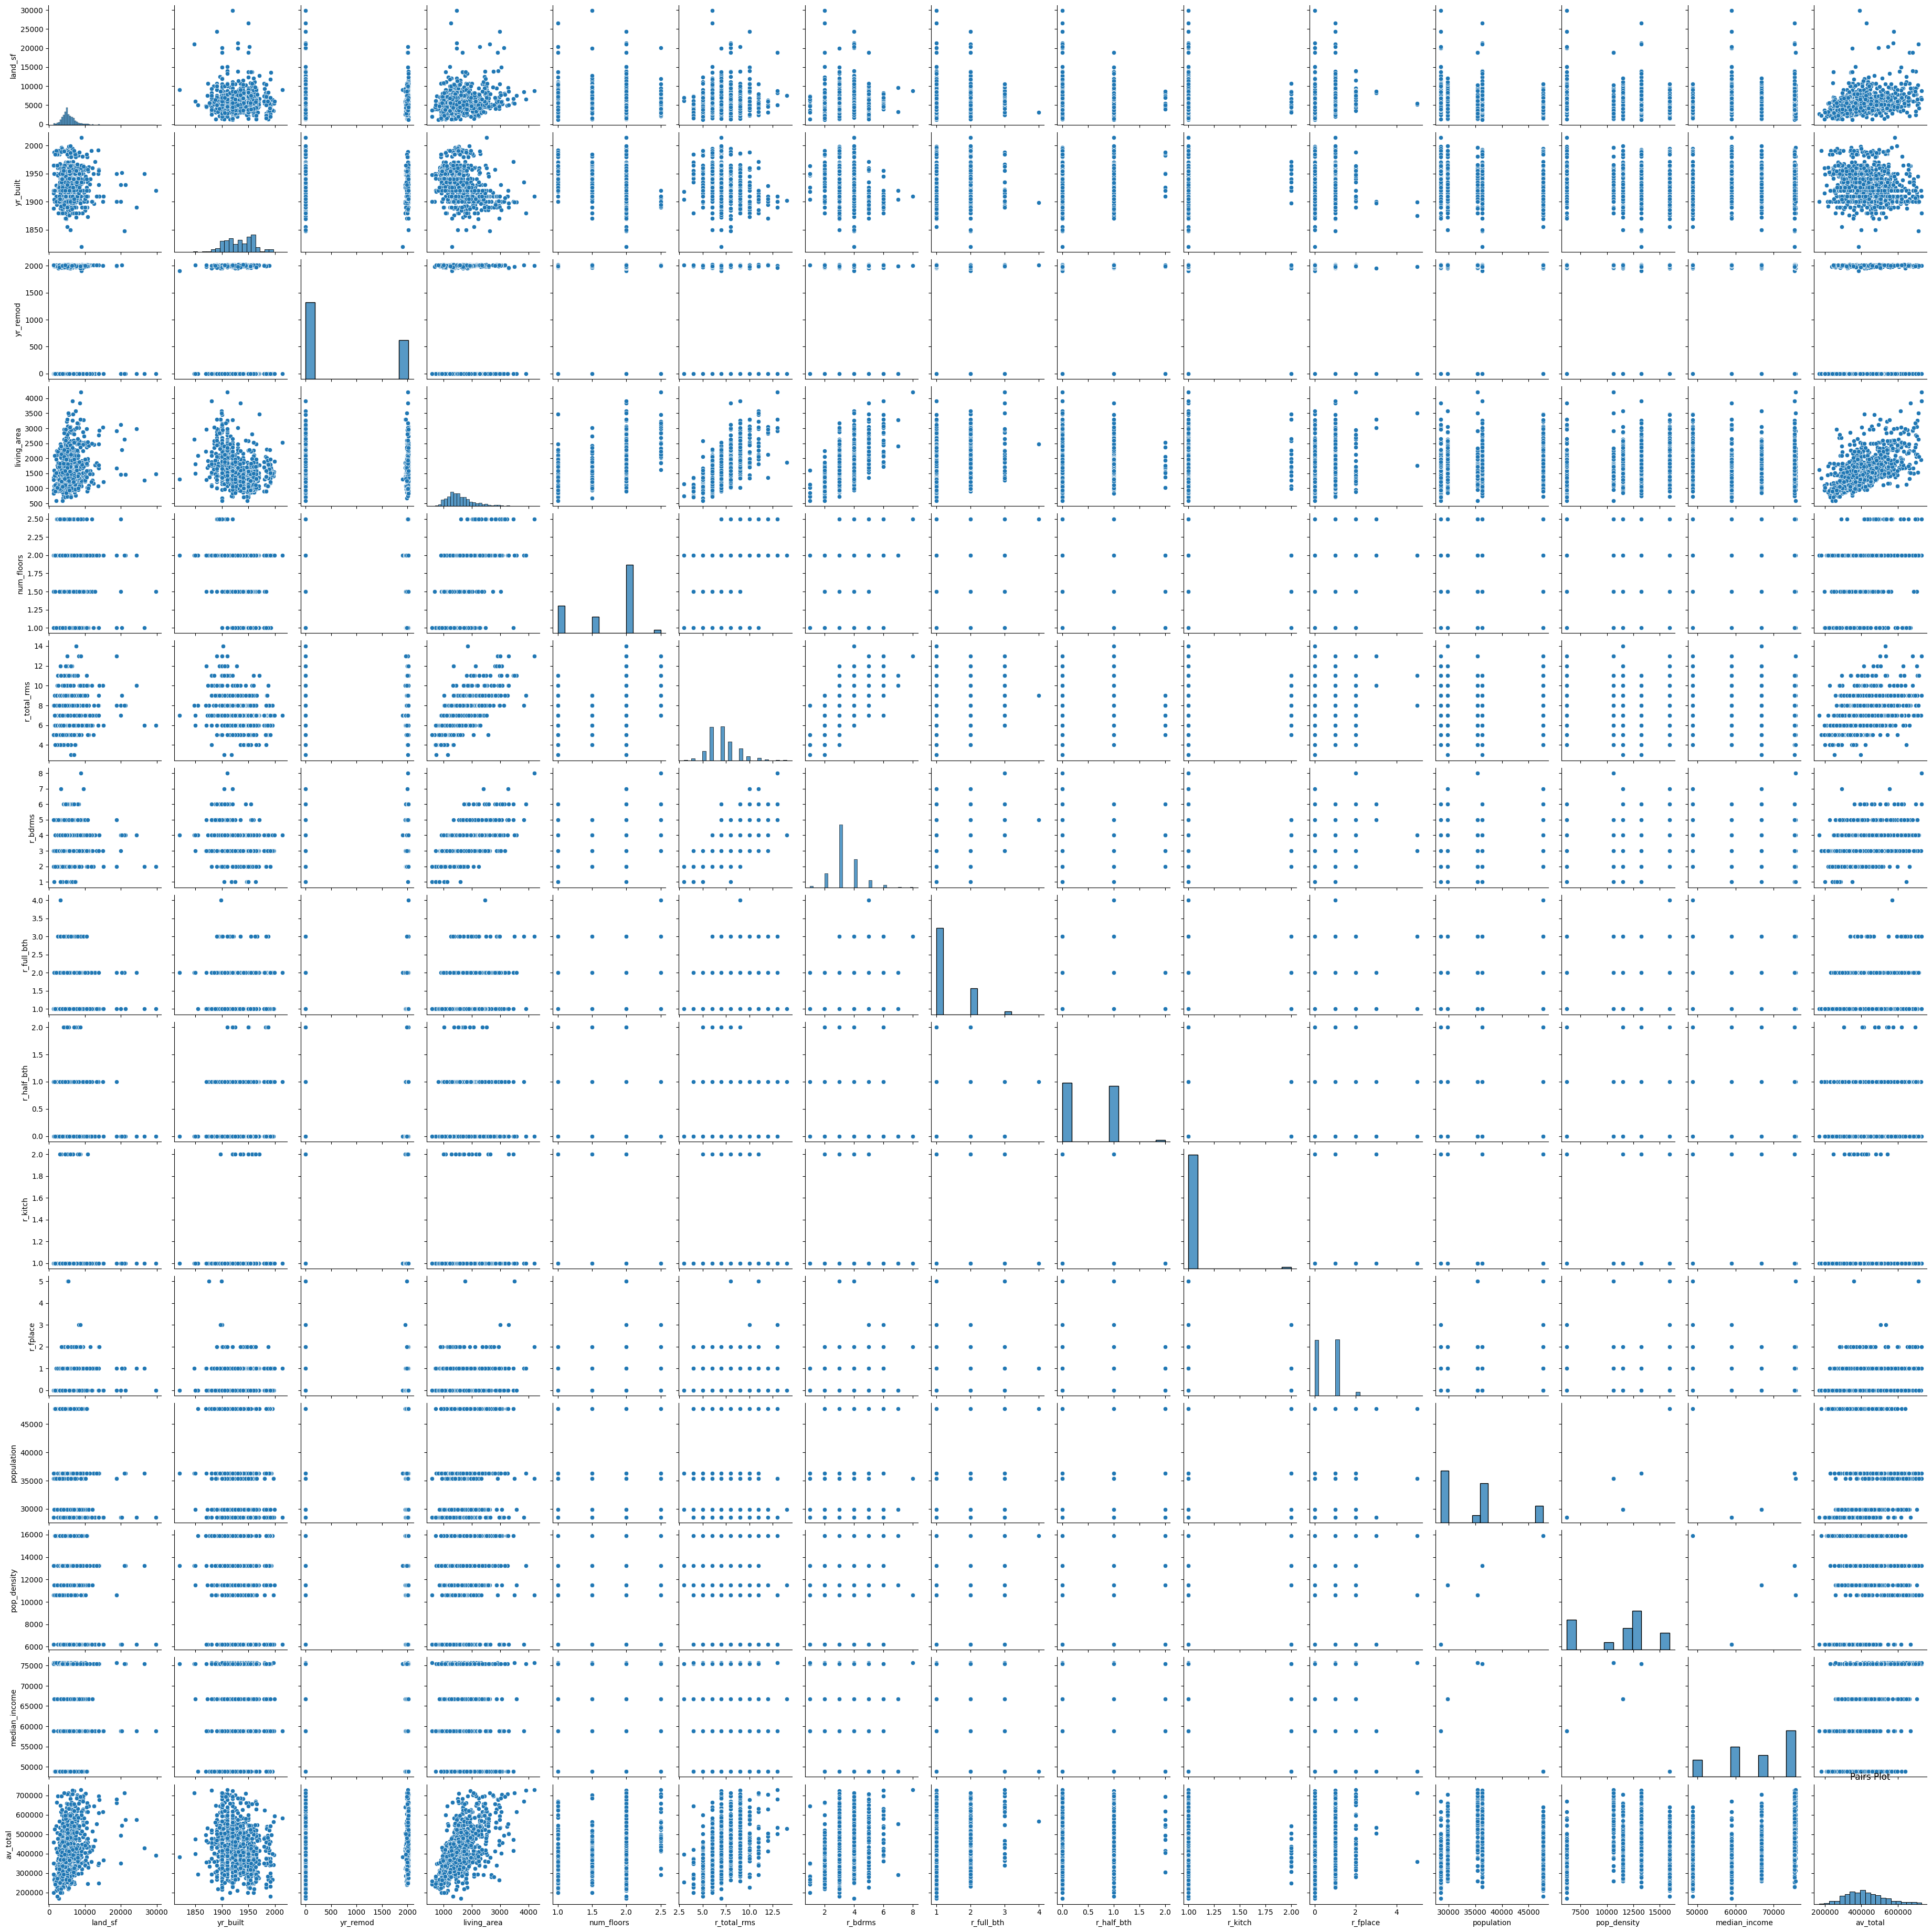

In [ ]:
sns.pairplot(boston[numeric_features].sample(1000))
plt.title('Pairs Plot')
plt.show()

#Model 1 Analysis

#Merging Predictions to Boston Dataframe

In [ ]:
pred1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analytics Software Tech- SS/Projects/Project 6 Final/Data/model1_predictions-1.csv')
pred1.head()

pid        pred
0   10 492976.2739
1   20 696277.0579
2   30 393368.8548
3   40 458700.8346
4   50 467320.9977

In [ ]:
boston_prep1 = boston.merge(pred1, on='pid')
boston_prep1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12985 entries, 0 to 12984
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              12985 non-null  int64  
 1   zipcode          12985 non-null  int64  
 2   own_occ          12985 non-null  object 
 3   land_sf          12985 non-null  float64
 4   yr_built         12985 non-null  int64  
 5   yr_remod         12985 non-null  float64
 6   living_area      12985 non-null  int64  
 7   num_floors       12985 non-null  float64
 8   structure_class  12985 non-null  object 
 9   r_bldg_styl      12985 non-null  object 
 10  r_roof_typ       12985 non-null  object 
 11  r_ext_fin        12985 non-null  object 
 12  r_total_rms      12985 non-null  int64  
 13  r_bdrms          12985 non-null  int64  
 14  r_full_bth       12985 non-null  int64  
 15  r_half_bth       12985 non-null  int64  
 16  r_bth_style      12985 non-null  object 
 17  r_kitch     

#Evaluating Model 1

Getting Dummies

In [ ]:
boston_mod1_dummies = pd.get_dummies(boston_prep1, columns = ['zipcode','own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state'])

boston_mod1_dummies.head()

pid    land_sf  yr_built  yr_remod  living_area  num_floors  r_total_rms  \
0   10 10288.0000      1992    0.0000         1681      1.0000            6   
1   30  8512.0000      1920    0.0000         1160      2.0000            5   
2   40  3187.0000      1900 2001.0000         1868      2.0000            7   
3   50 10088.0000      1971 1975.0000         1534      1.0000            7   
4   60  3500.0000      1960 1987.0000         1632      2.0000            6   

   r_bdrms  r_full_bth  r_half_bth  ...  r_view_A  r_view_E  r_view_F  \
0        3           2           0  ...         1         0         0   
1        3           1           1  ...         1         0         0   
2        4           1           1  ...         0         0         1   
3        3           1           1  ...         0         0         0   
4        3           2           0  ...         1         0         0   

   r_view_G  r_view_P  city_state_Cambridge, MA  \
0         0         0                         0   
1         0         0                         1   
2         0         0                         0   
3         1         0                         0   
4         0         0                         1   

   city_state_Dorchester Center, MA  city_state_Hyde Park, MA  \
0                                 0                         1   
1                                 0                         0   
2                                 1                         0   
3                                 0                         1   
4                                 0                         0   

   city_state_Jamaica Plain, MA  city_state_Roslindale, MA  
0                             0                          0  
1                             0                          0  
2                             0                          0  
3                             0                          0  
4                             0                          0  

[5 rows x 104 columns]

In [ ]:
boston_mod1_dummies.columns

Index(['pid', 'land_sf', 'yr_built', 'yr_remod', 'living_area', 'num_floors',
       'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       ...
       'r_view_A', 'r_view_E', 'r_view_F', 'r_view_G', 'r_view_P',
       'city_state_Cambridge, MA', 'city_state_Dorchester Center, MA',
       'city_state_Hyde Park, MA', 'city_state_Jamaica Plain, MA',
       'city_state_Roslindale, MA'],
      dtype='object', length=104)

In [ ]:
boston_mod1_dummies.drop(columns=['pid','zip'],inplace=True)
boston_mod1_dummies.head()

land_sf  yr_built  yr_remod  living_area  num_floors  r_total_rms  \
0 10288.0000      1992    0.0000         1681      1.0000            6   
1  8512.0000      1920    0.0000         1160      2.0000            5   
2  3187.0000      1900 2001.0000         1868      2.0000            7   
3 10088.0000      1971 1975.0000         1534      1.0000            7   
4  3500.0000      1960 1987.0000         1632      2.0000            6   

   r_bdrms  r_full_bth  r_half_bth  r_kitch  ...  r_view_A  r_view_E  \
0        3           2           0        1  ...         1         0   
1        3           1           1        1  ...         1         0   
2        4           1           1        1  ...         0         0   
3        3           1           1        2  ...         0         0   
4        3           2           0        1  ...         1         0   

   r_view_F  r_view_G  r_view_P  city_state_Cambridge, MA  \
0         0         0         0                         0   
1         0         0         0                         1   
2         1         0         0                         0   
3         0         1         0                         0   
4         0         0         0                         1   

   city_state_Dorchester Center, MA  city_state_Hyde Park, MA  \
0                                 0                         1   
1                                 0                         0   
2                                 1                         0   
3                                 0                         1   
4                                 0                         0   

   city_state_Jamaica Plain, MA  city_state_Roslindale, MA  
0                             0                          0  
1                             0                          0  
2                             0                          0  
3                             0                          0  
4                             0                          0  

[5 rows x 102 columns]

In [ ]:
X = boston_mod1_dummies.drop(columns=['av_total'])
y = boston_mod1_dummies['av_total']
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg

LinearRegression()

In [ ]:
features_df = pd.DataFrame({'Feature': linear_reg.feature_names_in_, 'Coefficient': linear_reg.coef_})
features_df

Feature  Coefficient
0                             land_sf       4.7681
1                            yr_built     -65.9560
2                            yr_remod       1.5762
3                         living_area      20.3539
4                          num_floors   -8623.1237
..                                ...          ...
96           city_state_Cambridge, MA  -22651.1777
97   city_state_Dorchester Center, MA    1926.5509
98           city_state_Hyde Park, MA   -8879.6093
99       city_state_Jamaica Plain, MA   18024.1892
100         city_state_Roslindale, MA   11580.0469

[101 rows x 2 columns]

In [ ]:
intercept_df = pd.DataFrame({'Feature': ['const'], 'Coefficient': [linear_reg.intercept_]})
intercept_df

Feature  Coefficient
0   const -309830.0784

In [ ]:
model_table = pd.concat([intercept_df, features_df], axis=0)
model_table

Feature  Coefficient
0                               const -309830.0784
0                             land_sf       4.7681
1                            yr_built     -65.9560
2                            yr_remod       1.5762
3                         living_area      20.3539
..                                ...          ...
96           city_state_Cambridge, MA  -22651.1777
97   city_state_Dorchester Center, MA    1926.5509
98           city_state_Hyde Park, MA   -8879.6093
99       city_state_Jamaica Plain, MA   18024.1892
100         city_state_Roslindale, MA   11580.0469

[102 rows x 2 columns]

In [ ]:
import statsmodels.api as sm
# Adding a constant to the model (intercept)
X_train_with_const = sm.add_constant(X)
# Fit the regression model using statsmodels
model_sm = sm.OLS(y, X_train_with_const).fit()
# Extracting p-values
p_values = model_sm.pvalues
p_values_df = pd.DataFrame(p_values, columns=['P-Value']).round(3).reset_index()
p_values_df

index  P-Value
0                             land_sf   0.0000
1                            yr_built   0.0590
2                            yr_remod   0.0020
3                         living_area   0.0000
4                          num_floors   0.0010
..                                ...      ...
96           city_state_Cambridge, MA   0.0000
97   city_state_Dorchester Center, MA   0.0000
98           city_state_Hyde Park, MA   0.0000
99       city_state_Jamaica Plain, MA   0.0000
100         city_state_Roslindale, MA   0.0960

[101 rows x 2 columns]

In [ ]:
model_table_df = model_table.merge(p_values_df, left_on='Feature', right_on='index').drop(columns=['index'])
model_table_df

Feature  Coefficient  P-Value
0                             land_sf       4.7681   0.0000
1                            yr_built     -65.9560   0.0590
2                            yr_remod       1.5762   0.0020
3                         living_area      20.3539   0.0000
4                          num_floors   -8623.1237   0.0010
..                                ...          ...      ...
96           city_state_Cambridge, MA  -22651.1777   0.0000
97   city_state_Dorchester Center, MA    1926.5509   0.0000
98           city_state_Hyde Park, MA   -8879.6093   0.0000
99       city_state_Jamaica Plain, MA   18024.1892   0.0000
100         city_state_Roslindale, MA   11580.0469   0.0960

[101 rows x 3 columns]

Finding what Features do not Affect the Assessed Value of a House

In [ ]:
model_table_df[model_table_df['P-Value'] > 0.05 ]

Feature  Coefficient  P-Value
1                     yr_built     -65.9560   0.0590
11                  population       5.6900   0.9540
12                 pop_density      -5.6896   0.2050
14                        pred       0.4023   0.7820
17                zipcode_2131   11580.0469   0.0960
23              r_bldg_styl_BL    7477.4547   0.8140
27              r_bldg_styl_CP   -3387.8105   0.4160
31              r_bldg_styl_RE   -5277.1429   0.4280
38              r_bldg_styl_TL   -9596.1477   0.3660
40                r_roof_typ_F  -11997.5187   0.0570
41                r_roof_typ_G    1815.1256   0.5250
43                r_roof_typ_L    4534.2914   0.0870
45                r_roof_typ_S    3673.8025   0.4370
48                 r_ext_fin_C   -3434.6582   0.5850
50                 r_ext_fin_G   15212.4616   0.7220
51                 r_ext_fin_M   -7895.7974   0.0580
53                 r_ext_fin_S   -7364.6165   0.1810
54                 r_ext_fin_U    2673.9218   0.7150
55                 r_ext_fin_V   -6246.7273   0.3970
57               r_bth_style_L   20608.8987   0.2060
58               r_bth_style_M    1833.8355   0.8840
60               r_bth_style_S   -6025.7436   0.1730
62             r_kitch_style_M    4255.3180   0.3940
65                r_heat_typ_E     676.8514   0.9900
67                r_heat_typ_N  -16761.8778   0.0980
68                r_heat_typ_O   -2032.7967   0.8390
69                r_heat_typ_P   -8587.9145   0.2410
70                r_heat_typ_S    1335.6856   0.9710
72                      r_ac_C    2098.6327   0.7570
73                      r_ac_D    7394.3404   0.1400
75                 r_ext_cnd_A   -9291.8591   0.3150
76                 r_ext_cnd_E   25347.5913   0.5070
78                 r_ext_cnd_G   12299.2730   0.2600
79                 r_ext_cnd_P   -3855.3038   0.8040
81              r_ovrall_cnd_F    9253.6885   0.3440
87                 r_int_cnd_P  -19317.2108   0.2500
88                 r_int_fin_E   51774.5491   0.1280
89                 r_int_fin_N  -14734.4460   0.4120
90                 r_int_fin_S  -37040.1032   0.1930
91                    r_view_A    2638.1449   0.6310
100  city_state_Roslindale, MA   11580.0469   0.0960

In [ ]:
# calculate stats
reg_prediction_mod1 = boston_prep1['pred']
r2_mod1 = r2_score(y, reg_prediction_mod1)
mse_mod1 = mean_squared_error(y, reg_prediction_mod1)
mae_mod1 = mean_absolute_error(y, reg_prediction_mod1)

print("-- Linear Regression Stats for Assessed Value Total -- ")
print(f'R-Square: {r2_mod1:.3f}')
print(f" - RSQUARE: approximately {r2_mod1:.1%} of the variability in the total assessed value can be explained by model 1.")

print(f'Root Mean Squared Error: {mse_mod1**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse_mod1**0.5:,.2f} away from the actual assessed value")
print(f'Mean Absolute Error: {mae_mod1:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae_mod1:,.2f} from the actual")

-- Linear Regression Stats for Assessed Value Total -- 
R-Square: 0.300
 - RSQUARE: approximately 30.0% of the variability in the total assessed value can be explained by model 1.
Root Mean Squared Error: 89,024.48
 - RMSE: on average, our predictions are approximately $89,024.48 away from the actual assessed value
Mean Absolute Error: 67,398.84
 - MAE:  on average, the predictions made by the model are off by +/- $67,398.84 from the actual


#Creating Column for Residual Error

In [ ]:
boston_prep1['residual_error'] = boston_prep1['av_total'] - boston_prep1['pred']
boston_prep1.head()

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0   10     2136       Y 10288.0000      1992    0.0000         1681   
1   30     2132       Y  8512.0000      1920    0.0000         1160   
2   40     2124       Y  3187.0000      1900 2001.0000         1868   
3   50     2136       Y 10088.0000      1971 1975.0000         1534   
4   60     2132       Y  3500.0000      1960 1987.0000         1632   

   num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
0      1.0000               R          RR  ...         N      A  2136   
1      2.0000               R          CL  ...         N      A  2132   
2      2.0000               R          CL  ...         N      F  2124   
3      1.0000               R          RR  ...         N      G  2136   
4      2.0000               R          CL  ...         N      A  2132   

   population  pop_density  median_income             city_state    av_total  \
0       28488         6207          58890          Hyde Park, MA 321200.0000   
1       36314        13251          75446          Cambridge, MA 401230.0313   
2       47783        15913          48841  Dorchester Center, MA 450500.0000   
3       28488         6207          58890          Hyde Park, MA 368094.7401   
4       36314        13251          75446          Cambridge, MA 466723.1264   

         pred residual_error  
0 492976.2739   -171776.2739  
1 393368.8548      7861.1765  
2 458700.8346     -8200.8346  
3 467320.9977    -99226.2576  
4 427649.1826     39073.9438  

[5 rows x 35 columns]

#Plotting Residuals

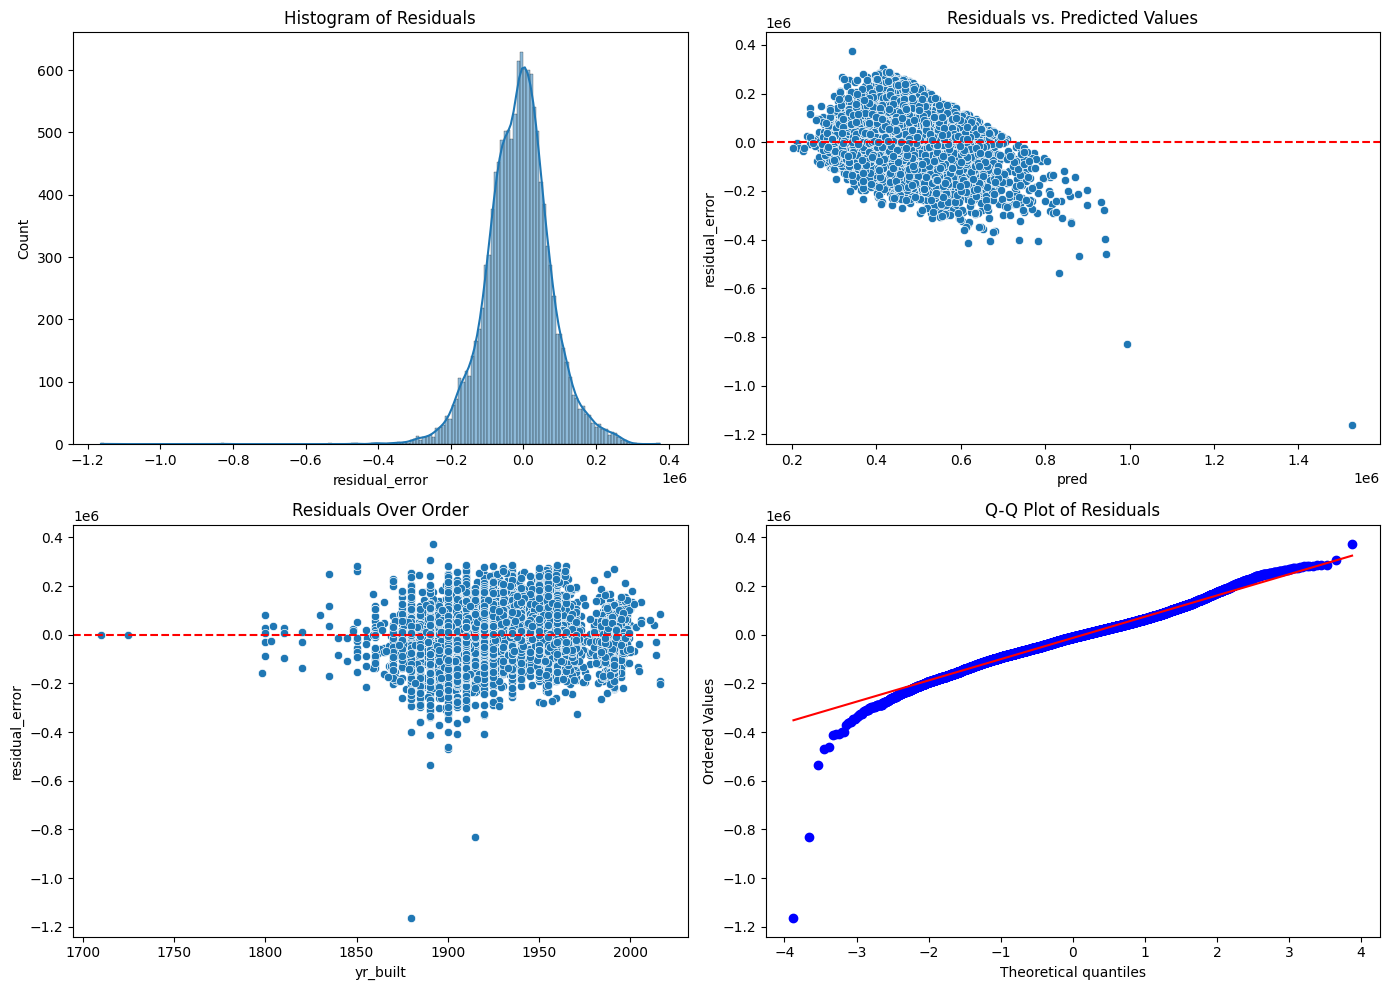

In [ ]:
import scipy.stats as stats

# Set up a 2x2 grid for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histogram of residuals
sns.histplot(boston_prep1['residual_error'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Residuals')

# Scatter plot of predicted values vs. residuals
sns.scatterplot(data=boston_prep1, x='pred', y='residual_error', ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs. Predicted Values')

# Plot residuals over order (using index as a proxy for order)
sns.scatterplot(data=boston_prep1, x='yr_built', y='residual_error', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Residuals Over Order')


# Q-Q plot of residuals
stats.probplot(boston_prep1['residual_error'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()



By filtering the data to remove outliers, the Q-Q plot shows a very strong linear relationship, but the tail is very heavy on the left side.

#Looking at Overestimates, Underestimates, and Best Predictions

Overestimate

In [ ]:
boston_prep1.nsmallest(10,'residual_error')

pid  zipcode own_occ     land_sf  yr_built  yr_remod  living_area  \
9227   101020     2136       Y 107158.0000      1880    0.0000         3224   
185      2040     2124       Y   5096.0000      1915    0.0000         5197   
5212    57150     2124       N  10000.0000      1890    0.0000         4062   
570      6330     2136       Y   4675.0000      1900    0.0000         4493   
6678    72940     2124       Y  14675.0000      1900    0.0000         4378   
12707  139310     2124       Y   4654.0000      1890    0.0000         2817   
6068    66340     2124       Y   4684.0000      1905    0.0000         3146   
6212    67900     2131       Y   7656.0000      1920 1980.0000         3703   
10301  112790     2124       Y   5019.0000      1900 1991.0000         3561   
12438  136370     2136       Y  14118.0000      1880    0.0000         4395   

       num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
9227       2.0000               R          CL  ...         N      A  2136   
185        2.0000               R          CL  ...         N      A  2124   
5212       3.0000               R          CV  ...         N      A  2124   
570        2.0000               R          CL  ...         N      A  2136   
6678       2.0000               R          VT  ...         N      A  2124   
12707      2.5000               R          CL  ...         N      A  2124   
6068       2.5000               R          CL  ...         N      A  2124   
6212       2.0000               R          CL  ...         N      A  2131   
10301      2.5000               R          CL  ...         N      A  2124   
12438      3.0000               R          CV  ...         N      A  2136   

       population  pop_density  median_income             city_state  \
9227        28488         6207          58890          Hyde Park, MA   
185         47783        15913          48841  Dorchester Center, MA   
5212        47783        15913          48841  Dorchester Center, MA   
570         28488         6207          58890          Hyde Park, MA   
6678        47783        15913          48841  Dorchester Center, MA   
12707       47783        15913          48841  Dorchester Center, MA   
6068        47783        15913          48841  Dorchester Center, MA   
6212        29826        11505          66735         Roslindale, MA   
10301       47783        15913          48841  Dorchester Center, MA   
12438       28488         6207          58890          Hyde Park, MA   

         av_total         pred residual_error  
9227  363300.0000 1526961.3356  -1163661.3356  
185   164700.0000  993973.8002   -829273.8002  
5212  296400.0000  831809.0332   -535409.0332  
570   410577.9109  880015.3733   -469437.4624  
6678  483700.0000  944619.8393   -460919.8393  
12707 205802.9236  618159.7380   -412356.8144  
6068  262700.0000  670457.9080   -407757.9080  
6212  375600.0000  782562.2734   -406962.2734  
10301 337000.0000  737627.3157   -400627.3157  
12438 542547.0760  941625.7242   -399078.6482  

[10 rows x 35 columns]

Underestimate

In [ ]:
boston_prep1.nlargest(10,'residual_error')

pid  zipcode own_occ   land_sf  yr_built  yr_remod  living_area  \
12138  133030     2130       Y 3770.0000      1892 2009.0000         1101   
4429    48650     2130       N 2016.0000      1890    0.0000         1818   
11535  126330     2130       N 3380.0000      1910 2016.0000         1830   
11350  124300     2130       N 8430.0000      1960 1993.0000         1500   
10744  117630     2130       Y 2548.0000      1935 1995.0000         1560   
8290    90610     2130       Y 2800.0000      1900 2002.0000         1728   
6862    74970     2130       Y 4402.0000      1965 1970.0000         1560   
11183  122460     2130       Y 6515.0000      1925 2011.0000         1340   
8379    91630     2130       Y 4120.0000      1850 1997.0000         1251   
11854  129920     2130       Y 6779.0000      1920 2014.0000         1276   

       num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
12138      2.0000               R          CL  ...         N      A  2130   
4429       2.0000               R          RM  ...         N      A  2130   
11535      2.5000               R          CL  ...         N      A  2130   
11350      1.0000               R          RN  ...         N      A  2130   
10744      2.0000               R          CL  ...         N      A  2130   
8290       2.0000               R          CL  ...         E      A  2130   
6862       2.0000               R          CL  ...         N      A  2130   
11183      2.0000               R          CL  ...         N      E  2130   
8379       1.5000               R          CP  ...         N      A  2130   
11854      2.0000               R          CL  ...         N      A  2130   

       population  pop_density  median_income         city_state    av_total  \
12138       35401        10618          75730  Jamaica Plain, MA 718600.0000   
4429        35401        10618          75730  Jamaica Plain, MA 722459.4607   
11535       35401        10618          75730  Jamaica Plain, MA 719300.0000   
11350       35401        10618          75730  Jamaica Plain, MA 710500.0000   
10744       35401        10618          75730  Jamaica Plain, MA 693000.0000   
8290        35401        10618          75730  Jamaica Plain, MA 717800.0000   
6862        35401        10618          75730  Jamaica Plain, MA 706700.0000   
11183       35401        10618          75730  Jamaica Plain, MA 686500.0000   
8379        35401        10618          75730  Jamaica Plain, MA 648800.0000   
11854       35401        10618          75730  Jamaica Plain, MA 674800.0000   

             pred residual_error  
12138 343577.2667    375022.7333  
4429  416255.3459    306204.1148  
11535 430428.0175    288871.9825  
11350 423297.4255    287202.5745  
10744 407265.5054    285734.4946  
8290  433691.9547    284108.0453  
6862  424135.2391    282564.7609  
11183 405198.5325    281301.4675  
8379  367641.3621    281158.6379  
11854 397142.8790    277657.1210  

[10 rows x 35 columns]

Best Estimates

In [ ]:
boston_prep1['abs_residual'] = boston_prep1['residual_error'].abs().round(3)
boston_prep1.nsmallest(10,'abs_residual')

pid  zipcode own_occ   land_sf  yr_built  yr_remod  living_area  \
9867   108000     2132       Y 4930.0000      1925    0.0000         1562   
12645  138650     2132       Y 5000.0000      1940    0.0000         1620   
377      4160     2132       Y 2828.0000      1964    0.0000         1847   
4628    50860     2131       Y 5000.0000      1985    0.0000         1512   
2633    28940     2136       Y 4374.0000      1945 2016.0000         1008   
5629    61620     2136       Y 5220.0000      1950    0.0000          916   
10514  115120     2131       Y 6000.0000      1957 1988.0000         1414   
3573    39270     2131       Y 5649.0000      1940    0.0000         1198   
1279    14120     2124       N 3825.0000      1921    0.0000         1377   
5703    62410     2136       N 7609.0000      1946    0.0000          967   

       num_floors structure_class r_bldg_styl  ... r_view   zip  population  \
9867       2.0000               R          CL  ...      A  2132       36314   
12645      2.0000               R          CL  ...      A  2132       36314   
377        2.0000               R          CL  ...      A  2132       36314   
4628       2.0000               R          CL  ...      A  2131       29826   
2633       1.0000               R          CP  ...      A  2136       28488   
5629       1.0000               R          CP  ...      A  2136       28488   
10514      1.5000               R          CP  ...      A  2131       29826   
3573       2.0000               R          CL  ...      G  2131       29826   
1279       2.0000               R          CL  ...      A  2124       47783   
5703       1.0000               R          CP  ...      A  2136       28488   

       pop_density  median_income             city_state    av_total  \
9867         13251          75446          Cambridge, MA 426700.0000   
12645        13251          75446          Cambridge, MA 437100.0000   
377          13251          75446          Cambridge, MA 455800.0000   
4628         11505          66735         Roslindale, MA 422600.0000   
2633          6207          58890          Hyde Park, MA 336800.0000   
5629          6207          58890          Hyde Park, MA 329700.0000   
10514        11505          66735         Roslindale, MA 414100.0000   
3573         11505          66735         Roslindale, MA 376637.6709   
1279         15913          48841  Dorchester Center, MA 364000.0000   
5703          6207          58890          Hyde Park, MA 332645.5494   

             pred residual_error abs_residual  
9867  426711.1342       -11.1342      11.1340  
12645 437111.4111       -11.4111      11.4110  
377   455814.7764       -14.7764      14.7760  
4628  422637.1949       -37.1949      37.1950  
2633  336843.4529       -43.4529      43.4530  
5629  329750.9177       -50.9177      50.9180  
10514 414153.8500       -53.8500      53.8500  
3573  376709.9864       -72.3155      72.3150  
1279  364088.1746       -88.1746      88.1750  
5703  332736.0661       -90.5167      90.5170  

[10 rows x 36 columns]

#Model 2 Analysis

#Merging Prediction to Dataframe

In [ ]:
pred2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analytics Software Tech- SS/Projects/Project 6 Final/Data/model2_predictions-1.csv')
pred2.head()

pid        pred
0   10 318559.3750
1   20 828821.6250
2   30 411252.3125
3   40 432201.1875
4   50 366862.2500

In [ ]:
boston_prep2 = boston.merge(pred2, on='pid')
boston_prep2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12985 entries, 0 to 12984
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              12985 non-null  int64  
 1   zipcode          12985 non-null  int64  
 2   own_occ          12985 non-null  object 
 3   land_sf          12985 non-null  float64
 4   yr_built         12985 non-null  int64  
 5   yr_remod         12985 non-null  float64
 6   living_area      12985 non-null  int64  
 7   num_floors       12985 non-null  float64
 8   structure_class  12985 non-null  object 
 9   r_bldg_styl      12985 non-null  object 
 10  r_roof_typ       12985 non-null  object 
 11  r_ext_fin        12985 non-null  object 
 12  r_total_rms      12985 non-null  int64  
 13  r_bdrms          12985 non-null  int64  
 14  r_full_bth       12985 non-null  int64  
 15  r_half_bth       12985 non-null  int64  
 16  r_bth_style      12985 non-null  object 
 17  r_kitch     

#Evaluating Model 2

Getting Dummies

In [ ]:
boston_mod2_dummies = pd.get_dummies(boston_prep1, columns = ['zipcode','own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state'])

boston_mod2_dummies.head()

pid    land_sf  yr_built  yr_remod  living_area  num_floors  r_total_rms  \
0   10 10288.0000      1992    0.0000         1681      1.0000            6   
1   30  8512.0000      1920    0.0000         1160      2.0000            5   
2   40  3187.0000      1900 2001.0000         1868      2.0000            7   
3   50 10088.0000      1971 1975.0000         1534      1.0000            7   
4   60  3500.0000      1960 1987.0000         1632      2.0000            6   

   r_bdrms  r_full_bth  r_half_bth  ...  r_view_A  r_view_E  r_view_F  \
0        3           2           0  ...         1         0         0   
1        3           1           1  ...         1         0         0   
2        4           1           1  ...         0         0         1   
3        3           1           1  ...         0         0         0   
4        3           2           0  ...         1         0         0   

   r_view_G  r_view_P  city_state_Cambridge, MA  \
0         0         0                         0   
1         0         0                         1   
2         0         0                         0   
3         1         0                         0   
4         0         0                         1   

   city_state_Dorchester Center, MA  city_state_Hyde Park, MA  \
0                                 0                         1   
1                                 0                         0   
2                                 1                         0   
3                                 0                         1   
4                                 0                         0   

   city_state_Jamaica Plain, MA  city_state_Roslindale, MA  
0                             0                          0  
1                             0                          0  
2                             0                          0  
3                             0                          0  
4                             0                          0  

[5 rows x 106 columns]

In [ ]:
boston_mod2_dummies.columns

Index(['pid', 'land_sf', 'yr_built', 'yr_remod', 'living_area', 'num_floors',
       'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       ...
       'r_view_A', 'r_view_E', 'r_view_F', 'r_view_G', 'r_view_P',
       'city_state_Cambridge, MA', 'city_state_Dorchester Center, MA',
       'city_state_Hyde Park, MA', 'city_state_Jamaica Plain, MA',
       'city_state_Roslindale, MA'],
      dtype='object', length=106)

In [ ]:
boston_mod2_dummies.drop(columns=['pid','zip'],inplace=True)
boston_mod2_dummies.head()

land_sf  yr_built  yr_remod  living_area  num_floors  r_total_rms  \
0 10288.0000      1992    0.0000         1681      1.0000            6   
1  8512.0000      1920    0.0000         1160      2.0000            5   
2  3187.0000      1900 2001.0000         1868      2.0000            7   
3 10088.0000      1971 1975.0000         1534      1.0000            7   
4  3500.0000      1960 1987.0000         1632      2.0000            6   

   r_bdrms  r_full_bth  r_half_bth  r_kitch  ...  r_view_A  r_view_E  \
0        3           2           0        1  ...         1         0   
1        3           1           1        1  ...         1         0   
2        4           1           1        1  ...         0         0   
3        3           1           1        2  ...         0         0   
4        3           2           0        1  ...         1         0   

   r_view_F  r_view_G  r_view_P  city_state_Cambridge, MA  \
0         0         0         0                         0   
1         0         0         0                         1   
2         1         0         0                         0   
3         0         1         0                         0   
4         0         0         0                         1   

   city_state_Dorchester Center, MA  city_state_Hyde Park, MA  \
0                                 0                         1   
1                                 0                         0   
2                                 1                         0   
3                                 0                         1   
4                                 0                         0   

   city_state_Jamaica Plain, MA  city_state_Roslindale, MA  
0                             0                          0  
1                             0                          0  
2                             0                          0  
3                             0                          0  
4                             0                          0  

[5 rows x 104 columns]

In [ ]:
X = boston_mod2_dummies.drop(columns=['av_total'])
y = boston_mod2_dummies['av_total']
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg

LinearRegression()

In [ ]:
features_df = pd.DataFrame({'Feature': linear_reg.feature_names_in_, 'Coefficient': linear_reg.coef_})
features_df

Feature  Coefficient
0                             land_sf       0.0000
1                            yr_built       0.0000
2                            yr_remod       0.0000
3                         living_area       0.0000
4                          num_floors       0.0000
..                                ...          ...
98           city_state_Cambridge, MA       0.0000
99   city_state_Dorchester Center, MA      -0.0000
100          city_state_Hyde Park, MA       0.0000
101      city_state_Jamaica Plain, MA      -0.0000
102         city_state_Roslindale, MA      -0.0000

[103 rows x 2 columns]

In [ ]:
intercept_df = pd.DataFrame({'Feature': ['const'], 'Coefficient': [linear_reg.intercept_]})
intercept_df

Feature  Coefficient
0   const       0.0001

In [ ]:
model_table = pd.concat([intercept_df, features_df], axis=0)
model_table

Feature  Coefficient
0                               const       0.0001
0                             land_sf       0.0000
1                            yr_built       0.0000
2                            yr_remod       0.0000
3                         living_area       0.0000
..                                ...          ...
98           city_state_Cambridge, MA       0.0000
99   city_state_Dorchester Center, MA      -0.0000
100          city_state_Hyde Park, MA       0.0000
101      city_state_Jamaica Plain, MA      -0.0000
102         city_state_Roslindale, MA      -0.0000

[104 rows x 2 columns]

In [ ]:
import statsmodels.api as sm
# Adding a constant to the model (intercept)
X_train_with_const = sm.add_constant(X)
# Fit the regression model using statsmodels
model_sm = sm.OLS(y, X_train_with_const).fit()
# Extracting p-values
p_values = model_sm.pvalues
p_values_df = pd.DataFrame(p_values, columns=['P-Value']).round(3).reset_index()
p_values_df

index  P-Value
0                             land_sf   0.0000
1                            yr_built   0.0000
2                            yr_remod   0.6200
3                         living_area   0.0000
4                          num_floors   0.6410
..                                ...      ...
98           city_state_Cambridge, MA   0.0000
99   city_state_Dorchester Center, MA   0.0000
100          city_state_Hyde Park, MA   0.0000
101      city_state_Jamaica Plain, MA   0.0000
102         city_state_Roslindale, MA   0.0000

[103 rows x 2 columns]

In [ ]:
model_table_df = model_table.merge(p_values_df, left_on='Feature', right_on='index').drop(columns=['index'])
model_table_df

Feature  Coefficient  P-Value
0                             land_sf       0.0000   0.0000
1                            yr_built       0.0000   0.0000
2                            yr_remod       0.0000   0.6200
3                         living_area       0.0000   0.0000
4                          num_floors       0.0000   0.6410
..                                ...          ...      ...
98           city_state_Cambridge, MA       0.0000   0.0000
99   city_state_Dorchester Center, MA      -0.0000   0.0000
100          city_state_Hyde Park, MA       0.0000   0.0000
101      city_state_Jamaica Plain, MA      -0.0000   0.0000
102         city_state_Roslindale, MA      -0.0000   0.0000

[103 rows x 3 columns]

Finding what Features do not Affect the Assessed Value of a House

In [ ]:
model_table_df[model_table_df['P-Value'] > 0.05 ]

Feature  Coefficient  P-Value
2       yr_remod       0.0000   0.6200
4     num_floors       0.0000   0.6410
5    r_total_rms       0.0000   0.6370
6        r_bdrms      -0.0000   0.5780
7     r_full_bth      -0.0000   0.7410
8     r_half_bth      -0.0000   0.6870
9        r_kitch      -0.0000   0.6170
10      r_fplace       0.0000   0.7660
16  abs_residual      -0.0000   0.0900

In [ ]:
# calculate stats
reg_prediction_mod2 = boston_prep2['pred']
r2_mod2 = r2_score(y, reg_prediction_mod2)
mse_mod2 = mean_squared_error(y, reg_prediction_mod2)
mae_mod2 = mean_absolute_error(y, reg_prediction_mod2)

print("-- Linear Regression Stats for Assess Value Total -- ")
print(f'R-Square: {r2_mod2:.3f}')
print(f" - RSQUARE: approximately {r2_mod2:.1%} of the variability in the total assessed value can be explained by model 2.")

print(f'Root Mean Squared Error: {mse_mod2**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse_mod1**0.5:,.2f} away from the actual assessed value")
print(f'Mean Absolute Error: {mae_mod2:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae_mod2:,.2f} from the actual")

-- Linear Regression Stats for Assess Value Total -- 
R-Square: 0.910
 - RSQUARE: approximately 91.0% of the variability in the total assessed value can be explained by model 2.
Root Mean Squared Error: 31,865.41
 - RMSE: on average, our predictions are approximately $89,024.48 away from the actual assessed value
Mean Absolute Error: 22,927.83
 - MAE:  on average, the predictions made by the model are off by +/- $22,927.83 from the actual


Model 2's R-Square value is much higher than Model 1's indicating that it is much more accurate at predicting the assessed value of a house than model 1.

#Creating Column for Residual Error

In [ ]:
boston_prep2['residual_error'] = boston_prep2['av_total'] - boston_prep2['pred']
boston_prep2.head()

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0   10     2136       Y 10288.0000      1992    0.0000         1681   
1   30     2132       Y  8512.0000      1920    0.0000         1160   
2   40     2124       Y  3187.0000      1900 2001.0000         1868   
3   50     2136       Y 10088.0000      1971 1975.0000         1534   
4   60     2132       Y  3500.0000      1960 1987.0000         1632   

   num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
0      1.0000               R          RR  ...         N      A  2136   
1      2.0000               R          CL  ...         N      A  2132   
2      2.0000               R          CL  ...         N      F  2124   
3      1.0000               R          RR  ...         N      G  2136   
4      2.0000               R          CL  ...         N      A  2132   

   population  pop_density  median_income             city_state    av_total  \
0       28488         6207          58890          Hyde Park, MA 321200.0000   
1       36314        13251          75446          Cambridge, MA 401230.0313   
2       47783        15913          48841  Dorchester Center, MA 450500.0000   
3       28488         6207          58890          Hyde Park, MA 368094.7401   
4       36314        13251          75446          Cambridge, MA 466723.1264   

         pred residual_error  
0 318559.3750      2640.6250  
1 411252.3125    -10022.2812  
2 432201.1875     18298.8125  
3 366862.2500      1232.4901  
4 476064.9688     -9341.8423  

[5 rows x 35 columns]

#Plotting Residuals

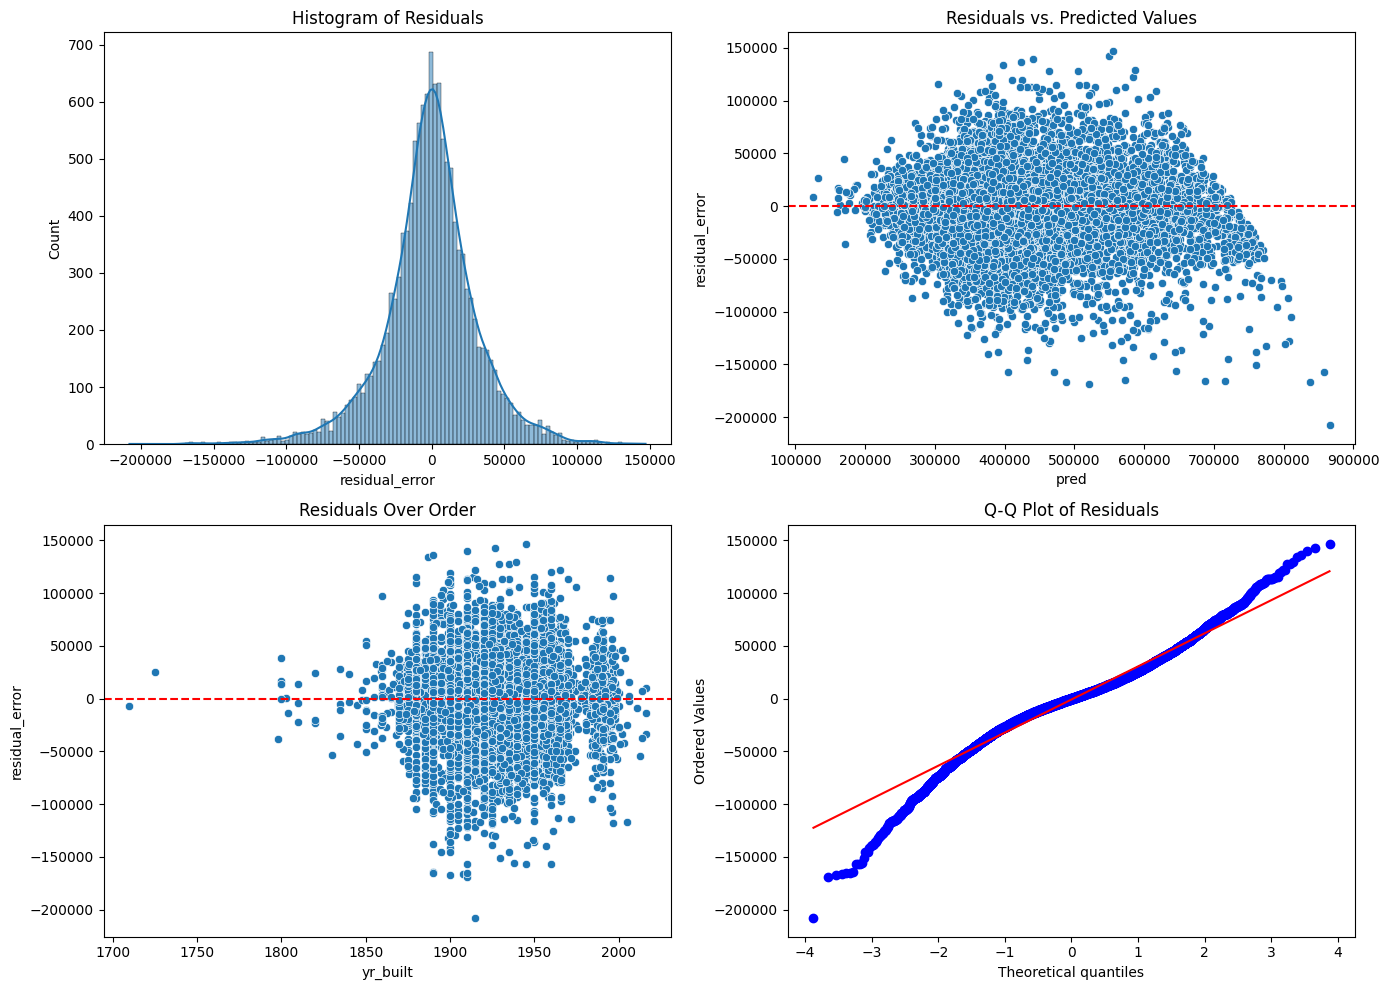

In [ ]:
import scipy.stats as stats

# Set up a 2x2 grid for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histogram of residuals
sns.histplot(boston_prep2['residual_error'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Residuals')

# Scatter plot of predicted values vs. residuals
sns.scatterplot(data=boston_prep2, x='pred', y='residual_error', ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs. Predicted Values')

# Plot residuals over order (using index as a proxy for order)
sns.scatterplot(data=boston_prep2, x='yr_built', y='residual_error', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Residuals Over Order')


# Q-Q plot of residuals
stats.probplot(boston_prep2['residual_error'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

Although the Q-Q plot for Model 2 shows that the residuals are not as normally distributed as Model 1's residuals, there is still a strong normallity to the data

#Looking at Overestimates, Underestimates, and Best Predictions

Overestimate

In [ ]:
boston_prep2.nsmallest(10,'residual_error')

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
3542    38940     2130       Y  9000.0000      1915    0.0000         2594   
8450    92410     2131       Y  7280.0000      1910 2007.0000         2150   
11184  122470     2130       Y  5600.0000      1900    0.0000         2880   
6273    68540     2131       Y  5894.0000      1908 1984.0000         2043   
9715   106350     2130       N  6945.0000      1890    0.0000         2492   
12232  134090     2130       Y  5752.0000      1910 2001.0000         2067   
478      5320     2131       Y 10246.0000      1890    0.0000         2630   
9712   106320     2130       Y  2800.0000      1945 1989.0000         1572   
3971    43710     2124       Y  4923.0000      1960 2004.0000         1176   
6884    75190     2130       Y 12960.0000      1910 2004.0000         2709   

       num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
3542       2.0000               R          CL  ...         N      A  2130   
8450       2.0000               R          CL  ...         N      A  2131   
11184      2.0000               R          CL  ...         N      A  2130   
6273       2.0000               R          CL  ...         N      A  2131   
9715       2.5000               R          CL  ...         N      A  2130   
12232      2.0000               R          CL  ...         N      A  2130   
478        2.0000               R          CL  ...         N      A  2131   
9712       2.0000               R          CL  ...         N      P  2130   
3971       2.0000               R          CL  ...         N      A  2124   
6884       2.0000               R          CL  ...         N      A  2130   

       population  pop_density  median_income             city_state  \
3542        35401        10618          75730      Jamaica Plain, MA   
8450        29826        11505          66735         Roslindale, MA   
11184       35401        10618          75730      Jamaica Plain, MA   
6273        29826        11505          66735         Roslindale, MA   
9715        35401        10618          75730      Jamaica Plain, MA   
12232       35401        10618          75730      Jamaica Plain, MA   
478         29826        11505          66735         Roslindale, MA   
9712        35401        10618          75730      Jamaica Plain, MA   
3971        47783        15913          48841  Dorchester Center, MA   
6884        35401        10618          75730      Jamaica Plain, MA   

         av_total        pred residual_error  
3542  657900.0000 865683.0625   -207783.0625  
8450  351800.0000 520393.0625   -168593.0625  
11184 671200.0000 838272.0000   -167072.0000  
6273  322100.0000 488623.1562   -166523.1562  
9715  549800.0000 715284.3750   -165484.3750  
12232 521800.0000 687193.4375   -165393.4375  
478   407800.0000 572399.4375   -164599.4375  
9712  313100.0000 470196.7812   -157096.7812  
3971  247800.0000 404759.9688   -156959.9688  
6884  701400.0000 858199.5000   -156799.5000  

[10 rows x 35 columns]

Underestimate

In [ ]:
boston_prep2.nlargest(10,'residual_error')

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
10642  116510     2132       Y 10000.0000      1945 1970.0000         1988   
10121  110790     2130       Y  3447.0000      1927    0.0000         1731   
437      4860     2124       Y  4253.0000      1910 2008.0000         1950   
7007    76520     2124       N  7916.0000      1890    0.0000         2557   
3704    40770     2124       Y  4252.0000      1887 2012.0000         2281   
11711  128270     2124       Y  3583.0000      1939 2006.0000         2867   
9727   106470     2130       Y  4463.0000      1935    0.0000         1626   
6770    73980     2130       Y  3416.0000      1929    0.0000         1348   
6862    74970     2130       Y  4402.0000      1965 1970.0000         1560   
1963    21580     2130       Y  2561.0000      1915    0.0000          992   

       num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
10642      1.0000               R          RN  ...         N      A  2132   
10121      1.5000               R          CP  ...         N      A  2130   
437        2.0000               R          CL  ...         N      A  2124   
7007       2.0000               R          CL  ...         N      A  2124   
3704       2.0000               R          CL  ...         N      A  2124   
11711      2.0000               R          CL  ...         N      A  2124   
9727       2.0000               R          CL  ...         N      A  2130   
6770       2.0000               R          CL  ...         N      A  2130   
6862       2.0000               R          CL  ...         N      A  2130   
1963       2.0000               R          CL  ...         N      F  2130   

       population  pop_density  median_income             city_state  \
10642       36314        13251          75446          Cambridge, MA   
10121       35401        10618          75730      Jamaica Plain, MA   
437         47783        15913          48841  Dorchester Center, MA   
7007        47783        15913          48841  Dorchester Center, MA   
3704        47783        15913          48841  Dorchester Center, MA   
11711       47783        15913          48841  Dorchester Center, MA   
9727        35401        10618          75730      Jamaica Plain, MA   
6770        35401        10618          75730      Jamaica Plain, MA   
6862        35401        10618          75730      Jamaica Plain, MA   
1963        35401        10618          75730      Jamaica Plain, MA   

         av_total        pred residual_error  
10642 702800.0000 555797.1250    147002.8750  
10121 691800.0000 549357.4375    142442.5625  
437   579900.0000 440270.9062    139629.0938  
7007  559900.0000 423666.4688    136233.5312  
3704  532100.0000 397928.4375    134171.5625  
11711 715800.0000 586490.0000    129310.0000  
9727  633700.0000 505634.1562    128065.8438  
6770  591900.0000 463999.5312    127900.4688  
6862  706700.0000 584481.6250    122218.3750  
1963  500400.0000 378305.4688    122094.5312  

[10 rows x 35 columns]

Best Estimates

In [ ]:
boston_prep2['abs_residual'] = boston_prep2['residual_error'].abs().round(3)
boston_prep2.nsmallest(10,'abs_residual')

pid  zipcode own_occ   land_sf  yr_built  yr_remod  living_area  \
12000  131520     2136       Y 6000.0000      1911 2013.0000         1182   
1940    21340     2131       Y 5163.0000      1920    0.0000         1068   
43        480     2132       Y 5987.0000      1960    0.0000          972   
1865    20530     2124       Y 2342.0000      1890 1970.0000         1478   
3504    38520     2124       Y 6420.0000      1880 2006.0000         2161   
7743    84520     2132       Y 5481.0000      1930    0.0000         1450   
10633  116420     2131       Y 5464.0000      1880    0.0000         1799   
10530  115280     2136       Y 5725.0000      1884    0.0000         1344   
1786    19640     2136       Y 5488.0000      1870 2005.0000         1046   
9395   102830     2131       Y 3600.0000      1910    0.0000         1179   

       num_floors structure_class r_bldg_styl  ... r_view   zip  population  \
12000      2.0000               R          CL  ...      A  2136       28488   
1940       1.0000               R          BW  ...      A  2131       29826   
43         1.0000               R          RN  ...      A  2132       36314   
1865       2.0000               R          CL  ...      A  2124       47783   
3504       2.0000               R          VT  ...      A  2124       47783   
7743       2.0000               R          CL  ...      A  2132       36314   
10633      2.0000               R          CL  ...      A  2131       29826   
10530      1.5000               R          CL  ...      A  2136       28488   
1786       2.0000               R          CL  ...      A  2136       28488   
9395       2.0000               R          CL  ...      A  2131       29826   

       pop_density  median_income             city_state    av_total  \
12000         6207          58890          Hyde Park, MA 332042.1316   
1940         11505          66735         Roslindale, MA 359000.0000   
43           13251          75446          Cambridge, MA 344800.0000   
1865         15913          48841  Dorchester Center, MA 285886.7055   
3504         15913          48841  Dorchester Center, MA 658200.0000   
7743         13251          75446          Cambridge, MA 454388.7767   
10633        11505          66735         Roslindale, MA 451563.1848   
10530         6207          58890          Hyde Park, MA 314484.7140   
1786          6207          58890          Hyde Park, MA 293376.6875   
9395         11505          66735         Roslindale, MA 352856.8131   

             pred residual_error abs_residual  
12000 332043.6562        -1.5246       1.5250  
1940  359010.5312       -10.5312      10.5310  
43    344813.3750       -13.3750      13.3750  
1865  285902.5938       -15.8883      15.8880  
3504  658181.5000        18.5000      18.5000  
7743  454407.9062       -19.1296      19.1300  
10633 451585.1250       -21.9402      21.9400  
10530 314506.9688       -22.2548      22.2550  
1786  293345.3750        31.3125      31.3120  
9395  352821.4062        35.4069      35.4070  

[10 rows x 36 columns]

In [ ]:
#Convert to HTML
#%%shell
#jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Analytics Software Tech- SS/Projects/Project 6 Final/final_Nik_Baldis.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Analytics Software Tech- SS/Projects/Project 6 Final/final_Nik_Baldis.ipynb to html
[NbConvertApp] Writing 6564485 bytes to /content/drive/MyDrive/Colab Notebooks/Analytics Software Tech- SS/Projects/Project 6 Final/final_Nik_Baldis.html
